# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [33]:
# if plotnine is not installed in Jupter then use the following command to install it 
np.random.seed(279)

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



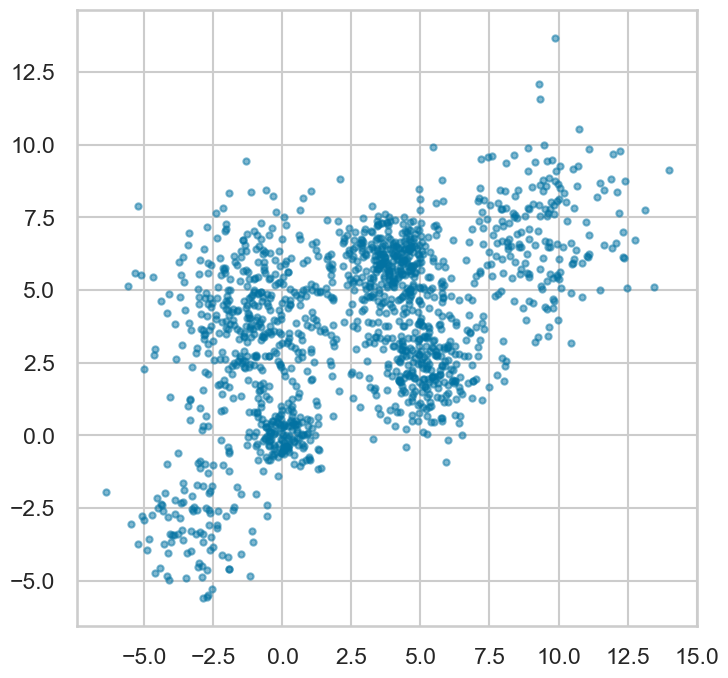

In [6]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [7]:
dftot = pd.DataFrame(Multi_blob_Data, columns=['col1','col2'])
dftot

col1       col2
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [83]:
df_multi_km = dftot.iloc[:,:]
print(df_multi_km)

           col1       col2
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]


#### Clustering the data from 2-10 clusters and plotting them:

           col1       col2
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]


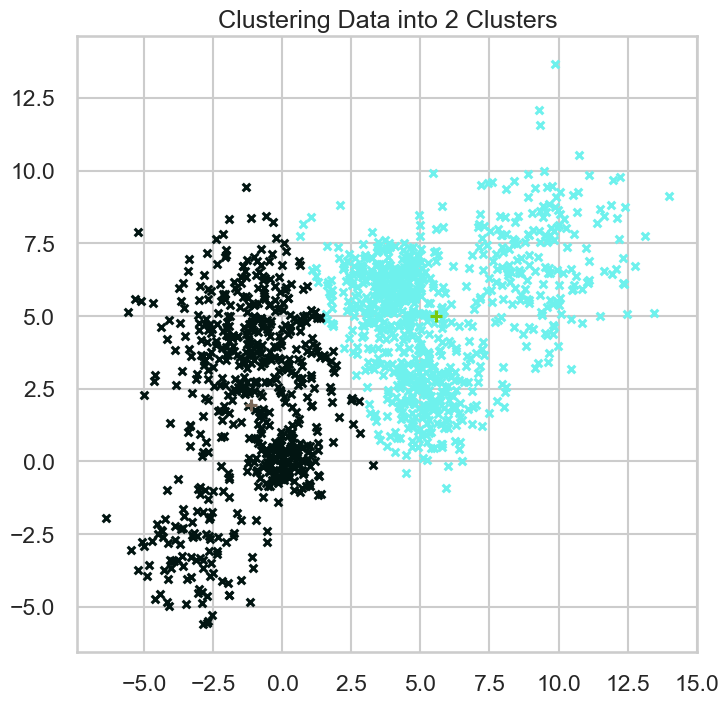

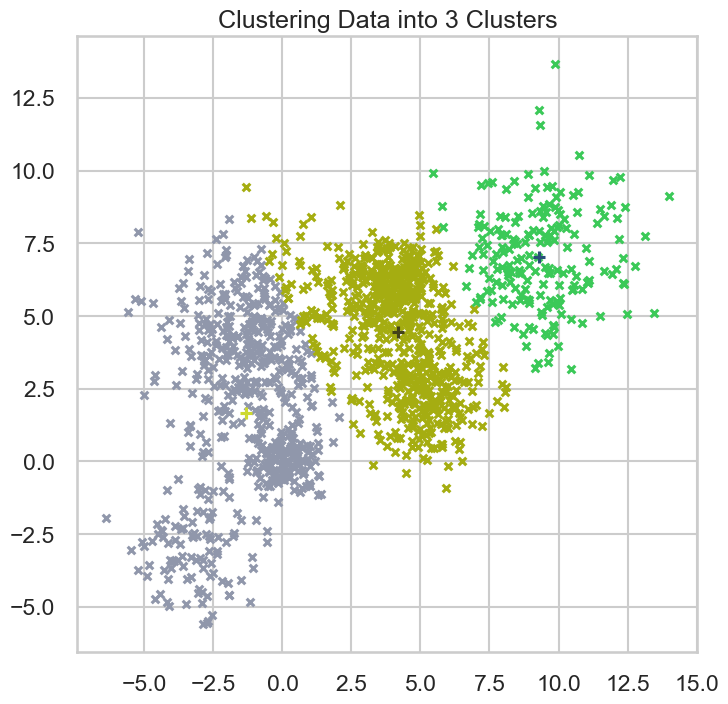

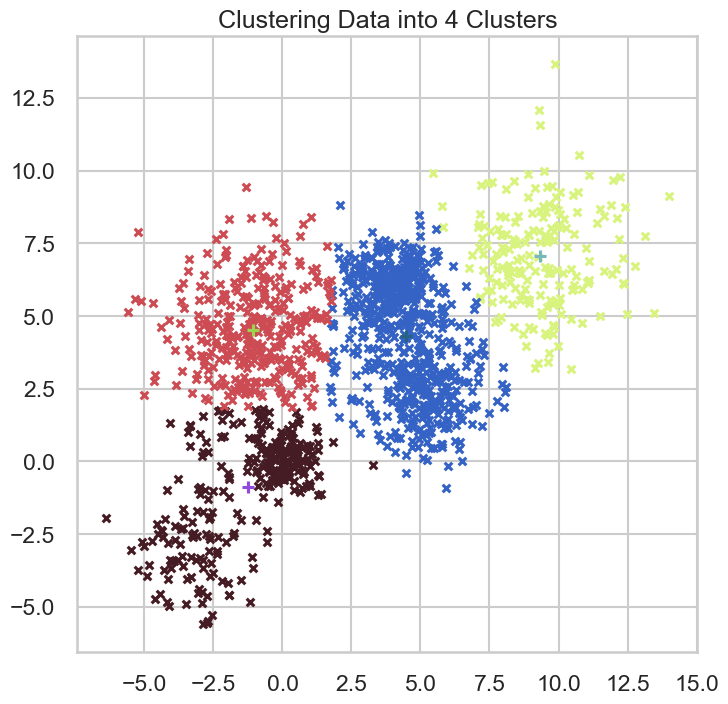

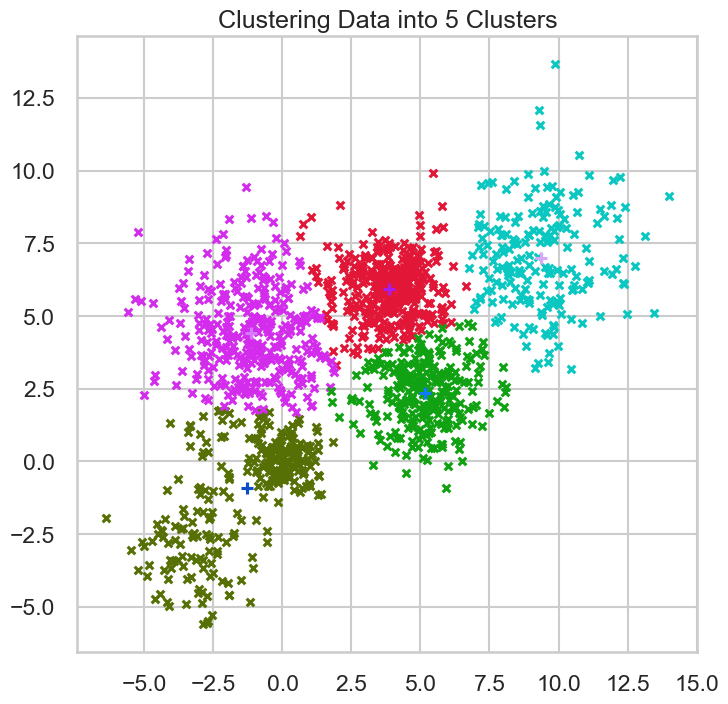

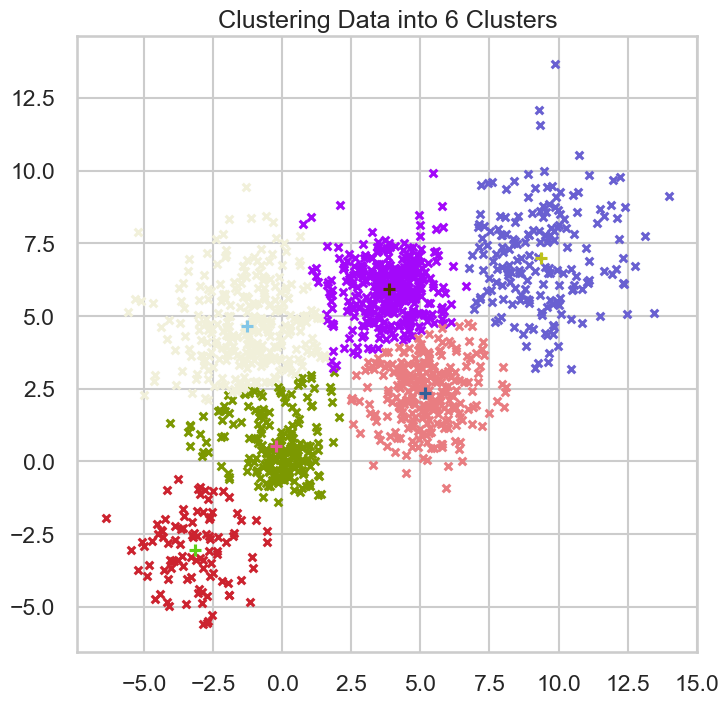

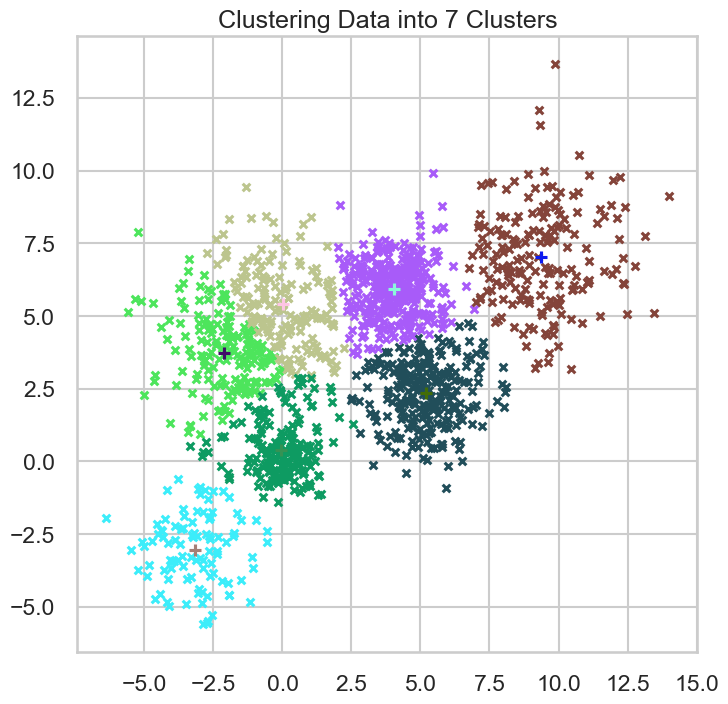

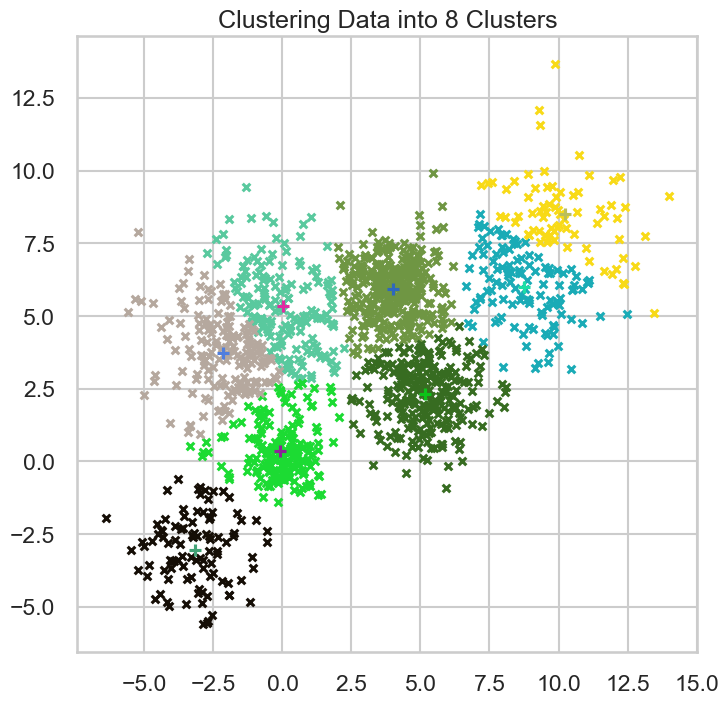

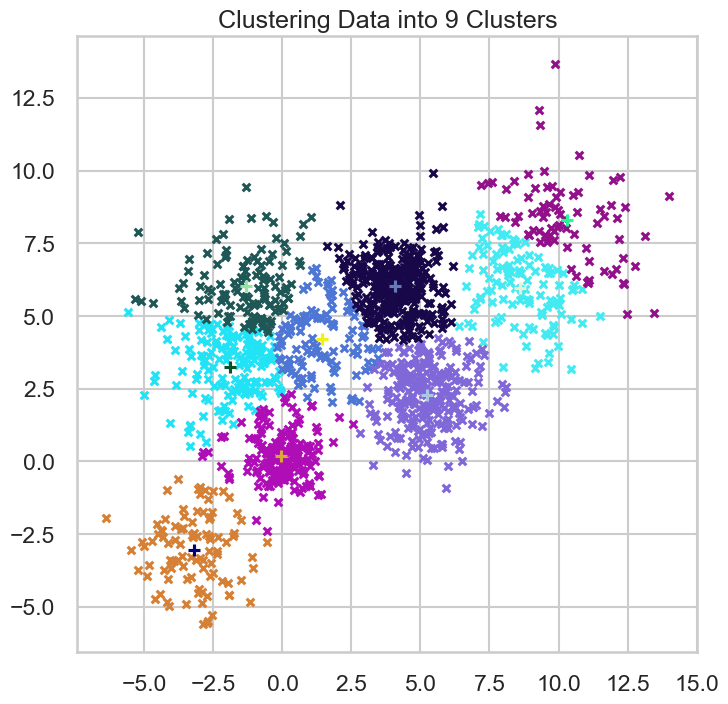

In [76]:
score_km = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(df_multi_km[['col1', 'col2']])
    df_multi_km['cluster'] = y_km
    set_cluster = set(y_km)
    for c in set_cluster:
        df = df_multi_km[df_multi_km['cluster'] == c]
        mean = df[['col1', 'col2']].mean()
        plt.scatter(df['col1'], df['col2'], s=30, c=np.random.rand(3,).reshape(1,-1), marker='x', label='cluster 1')
        plt.scatter(mean['col1'], mean['col2'], c=np.random.rand(3,).reshape(1,-1), marker='+')
    plt.title(f"Clustering Data into {k} Clusters")
    plt.show()
    score_km.append(silhouette_score(df_multi_km[['col1', 'col2']], y_km))

    

#### Silhouette score vs K clusters (from 2-10), results: best k = 6

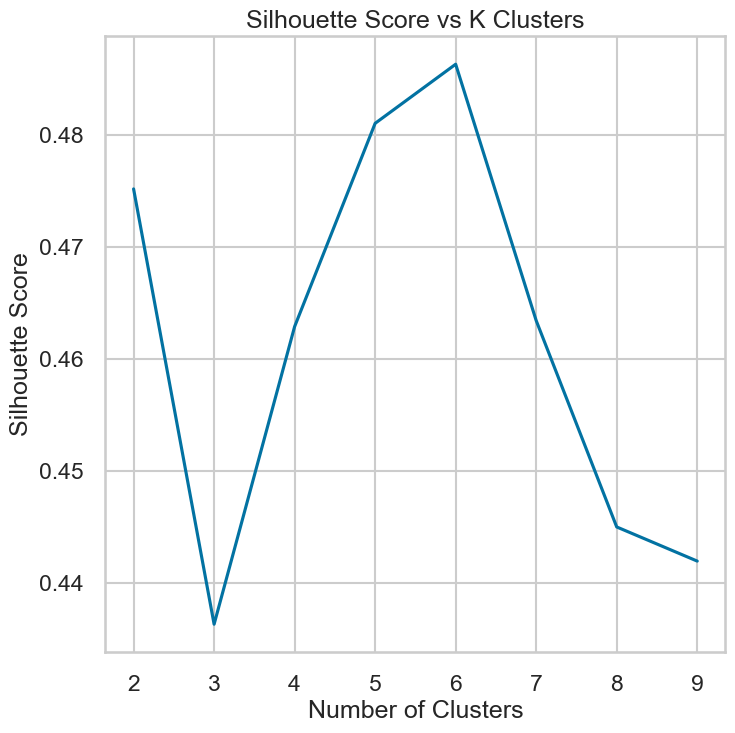

In [6]:
plt.title('Silhouette Score vs K Clusters')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score')
plt.plot(range(2,10),score_km)

#### Elbow method results show that best k = 4 

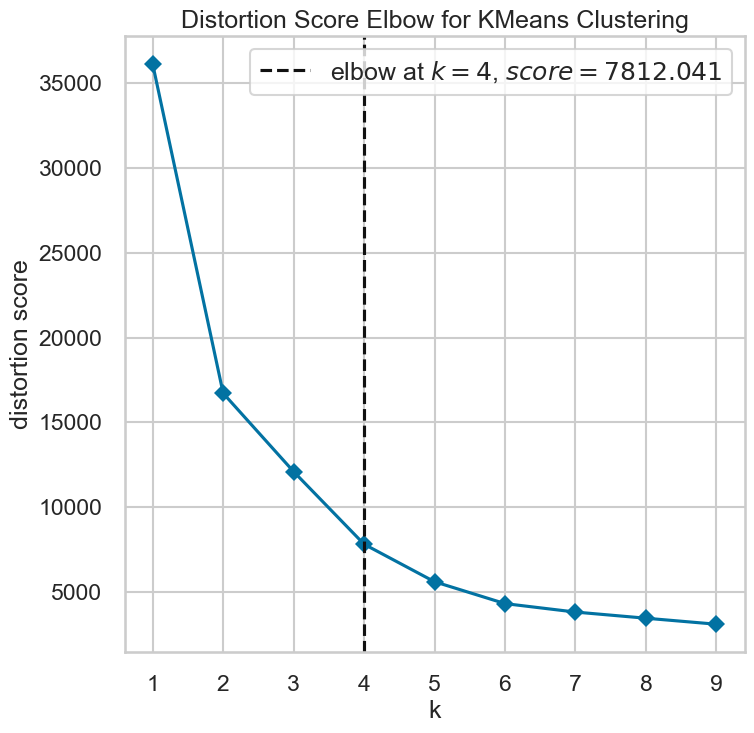

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(dftot[['col1', 'col2']])
visualizer.show()

#### Elbow method resulted in 4 clusters, however best silhouette score is for 6 clusters, therefore clustering with k = 6

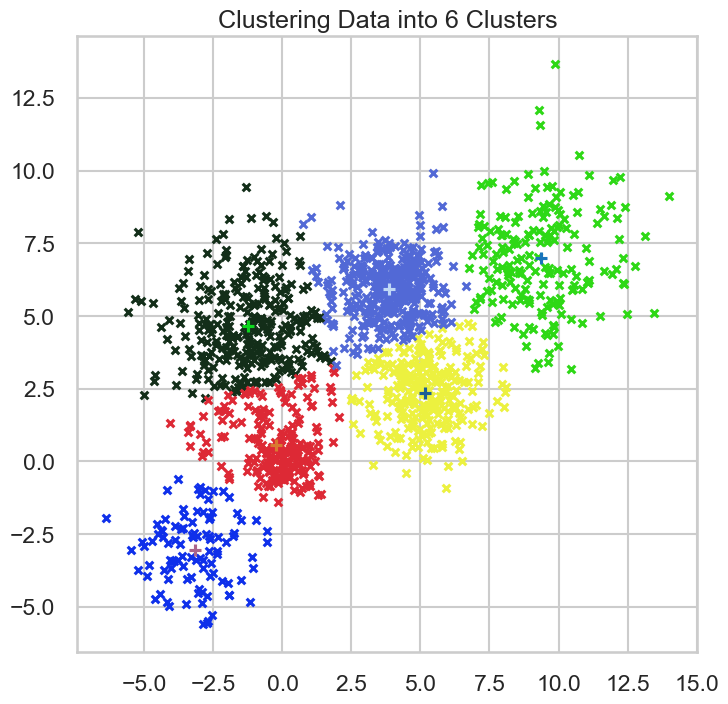

0.4859737366910219


In [84]:
km = KMeans(n_clusters=6)
y_km = km.fit_predict(df_multi_km)
df_multi_km['cluster'] = y_km
set_cluster = set(y_km)
for c in set_cluster:
    df = df_multi_km[df_multi_km['cluster'] == c]
    mean = df[['col1', 'col2']].mean()
    plt.scatter(df['col1'], df['col2'], s=30, c=np.random.rand(3,).reshape(1,-1), marker='x', label='cluster 1')
    plt.scatter(mean['col1'], mean['col2'], c=np.random.rand(3,).reshape(1,-1), marker='+')
plt.title(f"Clustering Data into 6 Clusters")
plt.show()
print(silhouette_score(df_multi_km[['col1', 'col2']], y_km))

#### KMeans clustered the data into 6 clusters with max silhouette score = 0.4859737366910219 

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [77]:
df_multi_hier = dftot.iloc[:,:]

### Step 1

max sil is 0.4716908069861964 with linkage average and affinity euclidean


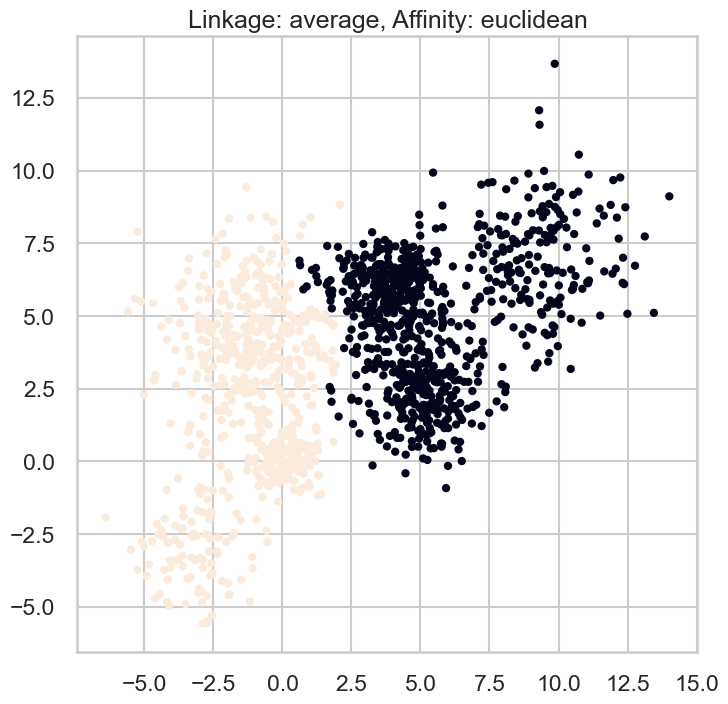

In [33]:
link = ['single','average']
aff = ['euclidean','manhattan','cosine']

sil = -100
li = ''
af = ''
score = 0
for l in link:
    for a in aff:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity=a, linkage=l)
        labels = hierarchical_cluster.fit_predict(df_multi_hier)
        score = silhouette_score(df_multi_hier, labels)
        if score > sil:
            sil = score 
            li = l
            af = a
# df_multi_hier
print(f'max sil is {sil} with linkage {li} and affinity {af}')
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity=af, linkage=li)
labels = hierarchical_cluster.fit_predict(df_multi_hier)

plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
plt.title(f'Linkage: {li}, Affinity: {af}')
plt.show()

### Step 2

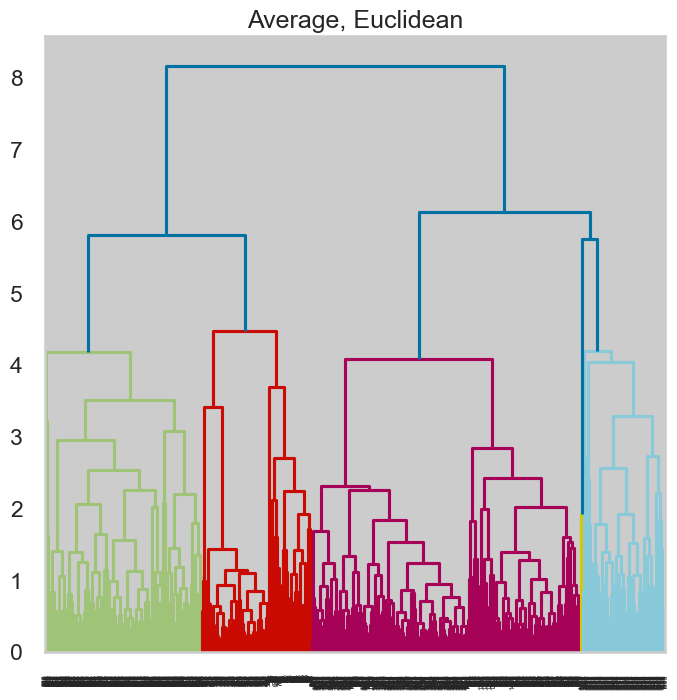

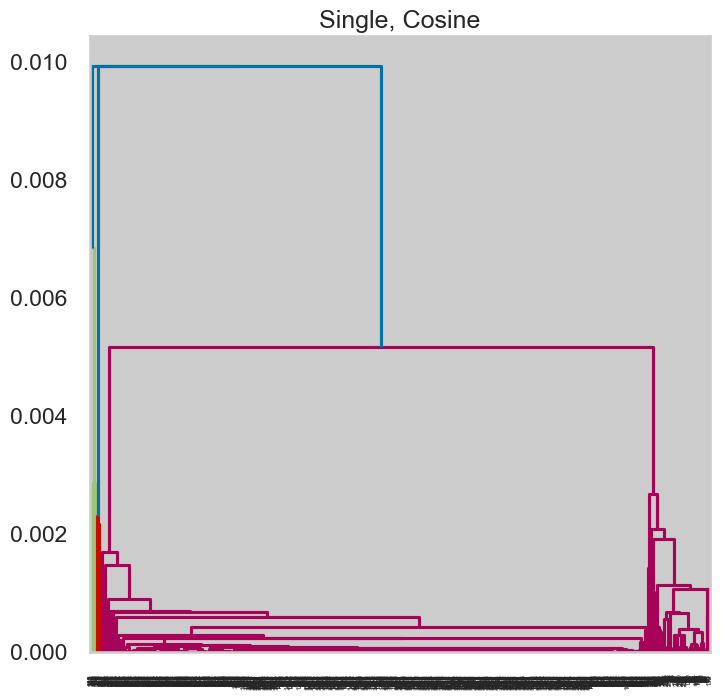

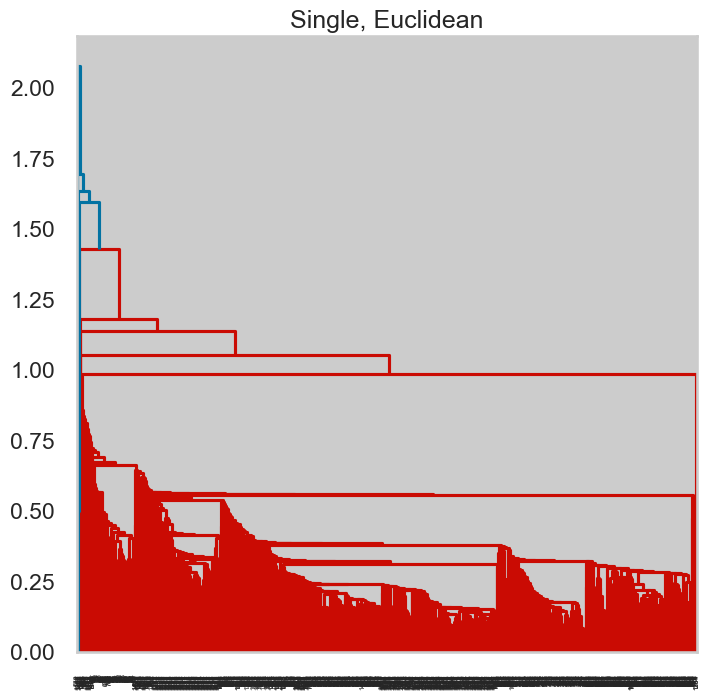

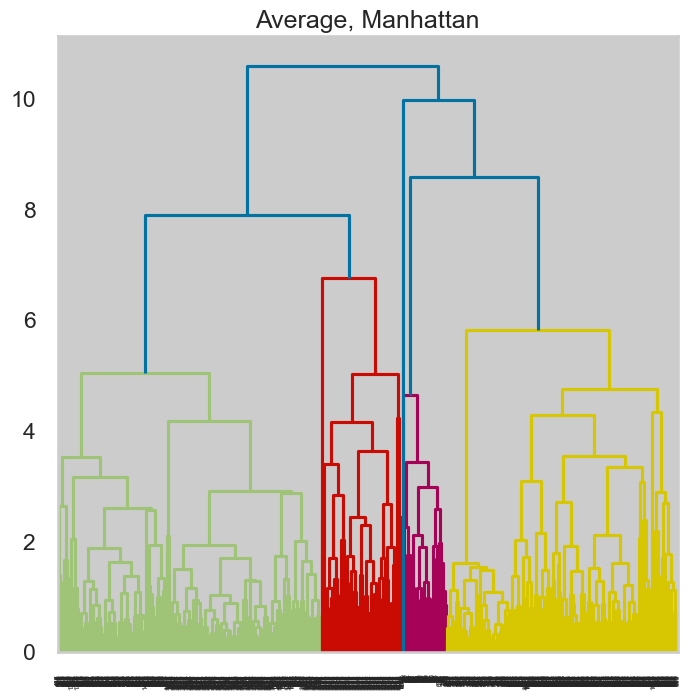

In [66]:
dendrogram = sch.dendrogram(sch.linkage(df_multi_hier, method  = "average", metric='euclidean'))
plt.title('Average, Euclidean')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(df_multi_hier, method  = "single", metric='cosine'))
plt.title('Single, Cosine')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(df_multi_hier, method  = "single", metric='euclidean'))
plt.title('Single, Euclidean')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(df_multi_hier, method  = "average", metric='cityblock'))
plt.title('Average, Manhattan')
plt.show()


In [78]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5,affinity='cosine', 
                                               linkage='single')
labels = hierarchical_cluster.fit_predict(df_multi_hier)
print('single, cosine sil is',silhouette_score( df_multi_hier, labels))


hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                               linkage='average')
labels = hierarchical_cluster.fit_predict(df_multi_hier)
print('average, euclidean sil is', silhouette_score(df_multi_hier, labels))


hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                               linkage='single')
labels = hierarchical_cluster.fit_predict(df_multi_hier)
print('single, euclidean sil is', silhouette_score(df_multi_hier, labels))

hierarchical_cluster = AgglomerativeClustering(n_clusters=3,affinity='manhattan', 
                                               linkage='average')
labels = hierarchical_cluster.fit_predict(df_multi_hier)
print('average, manhattan sil is', silhouette_score(df_multi_hier, labels))

single, cosine sil is 0.07699405164704985
average, euclidean sil is 0.4716908069861964
single, euclidean sil is 0.3218066204847175
average, manhattan sil is 0.40908233229322877


### Step 3 

#### choosing the best 2 silhouette scores (average and euclidean, average and manhattan), and trying out different distance thresholds

In [80]:
# using diff distance threshold  
thresh = 0
sil = -100

for i in np.arange(1, 8, 0.1):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='euclidean', 
                                                   linkage='average', distance_threshold=i)
    labels = hierarchical_cluster.fit_predict(df_multi_hier)
    score = silhouette_score(df_multi_hier, labels)
    if score > sil:
        sil = score 
        thresh = i
print(thresh,'threshold has best sil',silhouette_score(df_multi_hier, labels),'for average, euclidean')

6.200000000000005 threshold has best sil 0.4716908069861964 for average, euclidean


In [81]:
thresh = 0
sil = -100
for i in np.arange(1, 10, 0.1):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='manhattan', 
                                                   linkage='average', distance_threshold=i)
    labels = hierarchical_cluster.fit_predict(df_multi_hier)
    score = silhouette_score(df_multi_hier, labels)
    if score > sil:
        sil = score 
        thresh = i
print(thresh,'threshold has best sil',silhouette_score(df_multi_hier, labels),'for average, manhattan')

8.600000000000007 threshold has best sil 0.40908233229322877 for average, manhattan


#### All the previous steps give the same results, which is Average, Euclidean give the best silhouette score which is 0.4716908069861964, clustering the dataset into 2 clusters

#### Hierarchical clustering clustered the data into 2 clusters with max silhouette score = 0.4716908069861964 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [136]:
df_multi_dbscan = dftot.iloc[:,:]

In [137]:
coords = df_multi_dbscan[['col1', 'col2']]
sil = -1
eps = 0
minpts = 0
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
        ss = StandardScaler()
        coords = ss.fit_transform(coords)
        db = DBSCAN(eps=i, min_samples=j)
        db.fit(coords)
        y_pred = db.fit_predict(coords)
        if len(set(y_pred)) == 1:
            score = -2
        else: 
            score = silhouette_score(df_multi_dbscan, y_pred)
        if score > sil: 
            sil = score
            eps = i
            minpts = j
print(f'max sil is {sil} with epsilon: {eps} and minpoints: {minpts}')

max sil is 0.4541740252587351 with epsilon: 0.6 and minpoints: 5.0


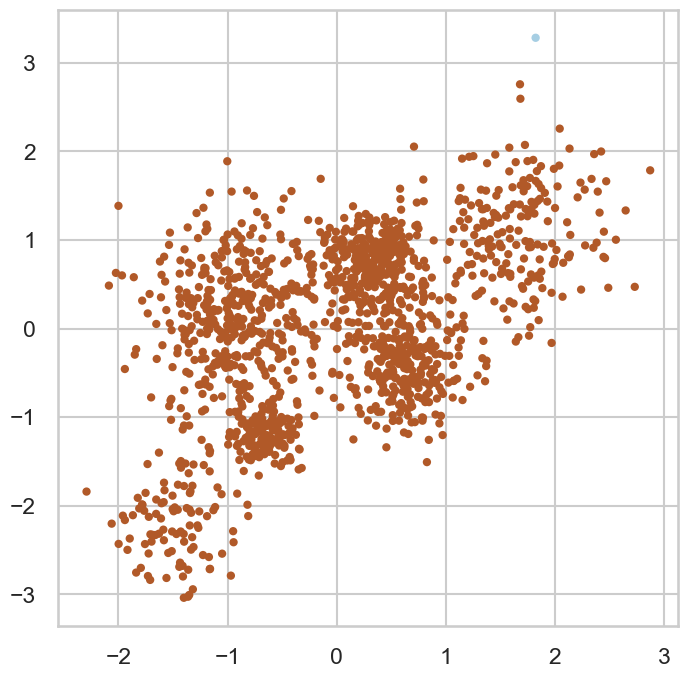

In [30]:
ss = StandardScaler()
coords = ss.fit_transform(df_multi_dbscan)

dbscan = DBSCAN(eps=0.6,min_samples=5)
y_db = dbscan.fit_predict(coords)
df_multi_dbscan['cluster'] = y_db

plt.scatter(coords[:, 0], coords[:, 1], c=y_db, cmap='Paired',s=20)
plt.show()

#### DBSCAN clustered the data into 2 clusters with max silhouette score = 0.4541740252587351 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [138]:
df_multi_gmm = dftot.iloc[:,:]

In [143]:
covar_type = ["full","tied","diag","spherical"]
clusters = [2,3,4,5,6,7,8,9,10]
sil = -100
n_clusters = 0
co_type = ''
for c in clusters:
    for co in covar_type:     
        gmm = GaussianMixture(n_components = c, covariance_type=co)
        gmm.fit(df_multi_gmm)
        clusters = gmm.predict(df_multi_gmm)
        score = silhouette_score(df_multi_gmm, clusters)
        if score > sil:
            sil = score 
            n_clusters = c
            co_type = co
print(f'best silhouette score: {n_clusters} clusters, {co_type} type, {sil} score')

best silhouette score: 6 clusters, full type, 0.5388402152823673 score


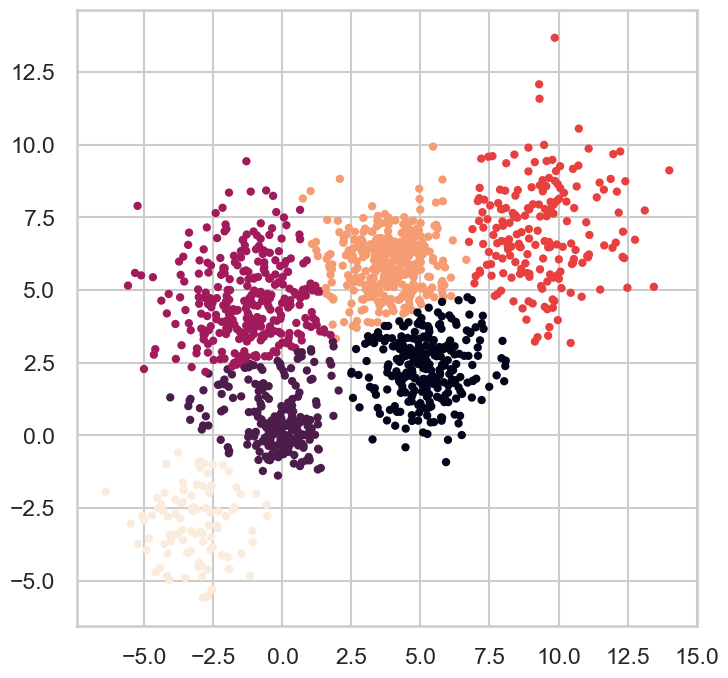

In [144]:
gmm = GaussianMixture(n_components = 6, covariance_type='full')
gmm.fit(df_multi_gmm)
clusters = gmm.predict(df_multi_gmm)
df_multi_gmm['cluster'] = clusters

plt.scatter(x=df_multi_gmm["col1"], y=df_multi_gmm["col2"],s=20, c=df_multi_gmm["cluster"])
plt.show()

#### GMM clustered the data into 6 clusters with max silhouette score = 0.5388402152823673 

### Highest silhouette score the for the multi blob dataset = 0.5388402152823673 for GMM, clustering the data into 6 clusters 

## Iris Data Set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target[[10, 25, 50]]
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(arr_scaled, columns=df.columns,index=df.index)
print(df_scaled)


df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             0.222222          0.625000           0.067797          0.041667   
1             0.166667          0.416667           0.067797          0.041667   
2             0.111111          0.500000           0.050847          0.041667   
3             0.083333          0.458333           0.084746          0.041667   
4             0.194444          0.666667           0.067797          0.041667   
..                 ...               ...                ...               ...   
145           0.666667          0.416667           0.711864          0.916667   
146           0.555556          0.208333           0.677966          0.750000   
147           0.611111          0.416667           0.711864          0.791667   
148           0.527778          0.583333           0.745763          0.916667   
149           0.444444          0.416667           0.694915          0.708333   

     target  
0       0.0  

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0       0.0     setosa  
1       0.0     setosa  
2       0.0     setosa  
3       0.0     setosa  
4       0.0     setosa  
..      ...        ...  
145     2.0  virginica  
146     2.0  virginica  
147     2.0  virginica  
148     2.0  virginica  
149     2.0  virginica  

[150 rows x 6 columns]

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]


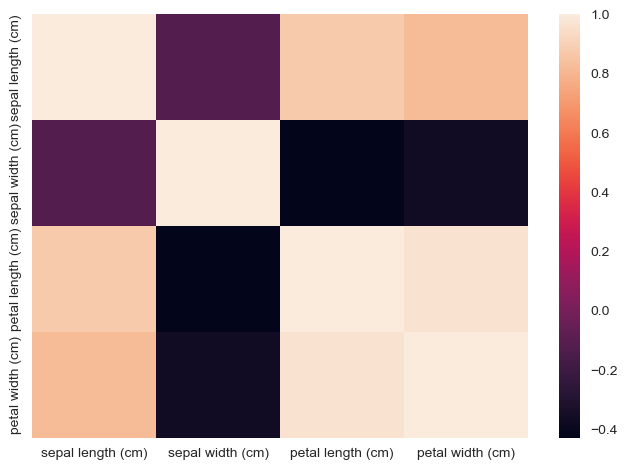

In [10]:
df_sc = df_scaled.drop(columns=["target"])
sns.heatmap(df_sc.corr())
print(df_sc)

#### There's high correlation between petal width and petal length, sepal length and petal length. Thus, reducing features to 3 instead of 4

## KMeans Clustering: 

### KMeans without normalization or PCA

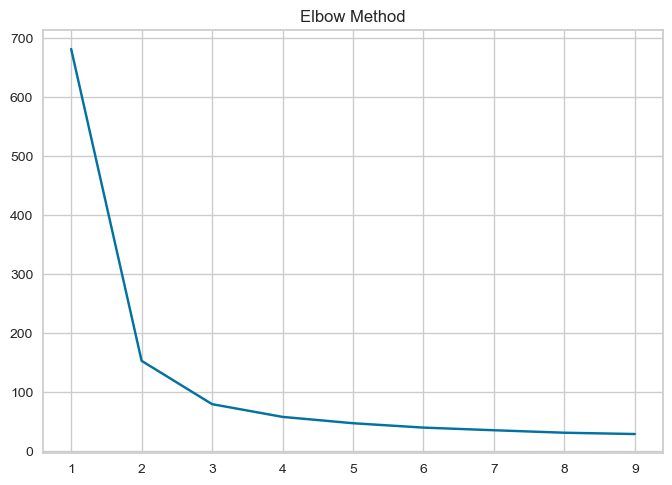

In [5]:
# df_features is df used for kmeans
score_km = []
df_features = df.iloc[:,0:4]
k = range(1,10)
sse = []

for i in k :
    km = KMeans(n_clusters = i)
    y_km = km.fit(df_features)
    sse.append(km.inertia_)
    
plt.title('Elbow Method')
plt.plot(k,sse)
plt.show()

In [6]:
km_2 = KMeans(n_clusters=2)
k2 = km_2.fit_predict(df_features)

km_3 = KMeans(n_clusters=3)
k3 = km_3.fit_predict(df_features)
print('sil score of k = 2:', silhouette_score(df_features, k2))
print('sil score of k = 3:', silhouette_score(df_features, k3))

sil score of k = 2: 0.6810461692117462
sil score of k = 3: 0.5528190123564095


#### Therefore, clustering the dataset into 2 clusters with max silhouette score = 0.6810461692117462

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     cluster  
0          1

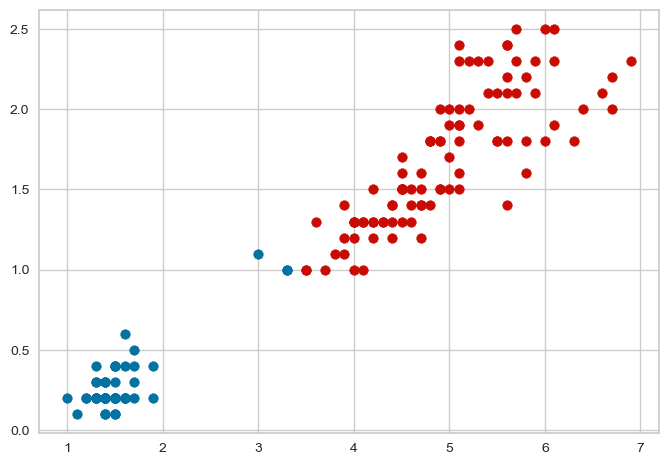

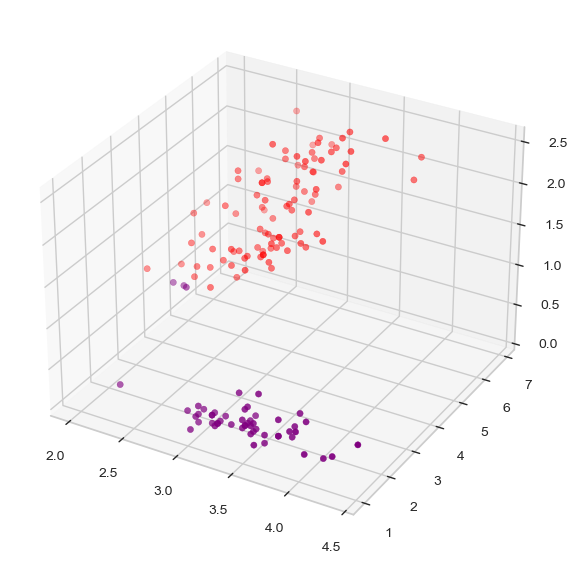

In [7]:
score_km = []
km = KMeans(n_clusters=2)
y_km = km.fit_predict(df_features)
df_features['cluster'] = y_km

print(df_features)

# 2d
df0 = df_features[df_features['cluster'] == 0]
df1 = df_features[df_features['cluster'] == 1]
# df2 = df_features[df_features['cluster'] == 2]

# plt.scatter(df0.iloc[:,0], df0.iloc[:,2], color='r' , label='Iris-versicolor')
# plt.scatter(df1.iloc[:,0], df1.iloc[:,2], color='b', label='Iris-setosa')
# plt.scatter(df2.iloc[:,0], df2.iloc[:,2], color='g' , label='Iris-virginica')

plt.scatter(df0.iloc[:,2], df0.iloc[:,3], color='r')
plt.scatter(df1.iloc[:,2], df1.iloc[:,3], color='b')
# plt.scatter(df2.iloc[:,0], df2.iloc[:,2], color='g')

plt.show()

# 3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' for label in km.labels_]
ax.scatter(df_features.iloc[:,1], df_features.iloc[:,2], df_features.iloc[:,3], c=colors)

#### Silhouette score for KMeans is 0.6810461692117462 for k=2

### KMeans with normalization

In [8]:
df_scaled_km = df_scaled.iloc[:,0:4].copy()
df_scaled_km

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]

In [9]:
for i in range(2,10):
    km_norm = KMeans(n_clusters=i)
    k_norm = km_norm.fit_predict(df_scaled_km)

    print(f'sil score of k = {i}:', silhouette_score(df_scaled_km, k_norm))

sil score of k = 2: 0.6300471284354711
sil score of k = 3: 0.5047687565398589
sil score of k = 4: 0.44506548804598556
sil score of k = 5: 0.3525708155722813
sil score of k = 6: 0.35171052893060906
sil score of k = 7: 0.35425808781634865
sil score of k = 8: 0.32771622244033527
sil score of k = 9: 0.3140357873865266


#### best silhouette score for normalized iris dataset is 0.6300471284354711, k = 2 

### KMeans with PCA

            0         1         2
0   -0.630703  0.107578 -0.018719
1   -0.622905 -0.104260 -0.049142
2   -0.669520 -0.051417  0.019644
3   -0.654153 -0.102885  0.023219
4   -0.648788  0.133488  0.015116
..        ...       ...       ...
145  0.551462  0.059841  0.086283
146  0.407146 -0.171821 -0.004102
147  0.447143  0.037560  0.049546
148  0.488208  0.149678  0.239209
149  0.312066 -0.031130  0.118672

[150 rows x 3 columns]


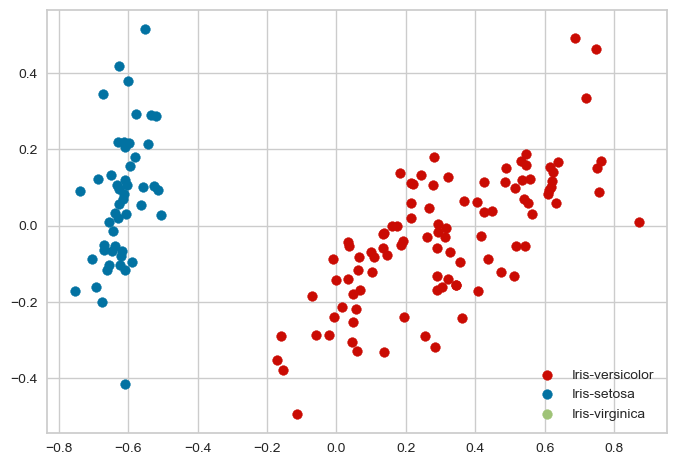

0.635899506244134


In [11]:
pca = PCA(n_components=3) 
X_new = pca.fit_transform(df_sc) # project the original data into the PCA space

df_iris_PCA = pd.DataFrame(X_new)
print(df_iris_PCA)

km_pca = KMeans(n_clusters=2)
y_km_pca = km_pca.fit_predict(df_iris_PCA)
df_iris_PCA['cluster'] = y_km_pca

df0 = df_iris_PCA[df_iris_PCA['cluster'] == 0]
df1 = df_iris_PCA[df_iris_PCA['cluster'] == 1]
df2 = df_iris_PCA[df_iris_PCA['cluster'] == 2]


plt.scatter(df0.iloc[:,0], df0.iloc[:,1], color='r' , label='Iris-versicolor')
plt.scatter(df1.iloc[:,0], df1.iloc[:,1], color='b', label='Iris-setosa')
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], color='g' , label='Iris-virginica')

plt.legend()
plt.show()

df_iris_PCA.drop(columns=["cluster"], inplace=True)

print(silhouette_score(df_iris_PCA, y_km_pca))

#### silhouette score for KMeans with PCA = 0.635899506244134 with k=2

## DBSCAN Clustering 

In [11]:
print(df_iris_PCA)
df_iris_dbscan = df.iloc[:,0:4]

            0         1         2
0   -0.630703  0.107578 -0.018719
1   -0.622905 -0.104260 -0.049142
2   -0.669520 -0.051417  0.019644
3   -0.654153 -0.102885  0.023219
4   -0.648788  0.133488  0.015116
..        ...       ...       ...
145  0.551462  0.059841  0.086283
146  0.407146 -0.171821 -0.004102
147  0.447143  0.037560  0.049546
148  0.488208  0.149678  0.239209
149  0.312066 -0.031130  0.118672

[150 rows x 3 columns]


In [12]:
# 1 -> PCA
# 2 -> noPCA

score_noPCA = -100
score_PCA = -100

ss = StandardScaler()
coords_PCA = ss.fit_transform(df_iris_PCA)
coords_noPCA = ss.fit_transform(df_iris_dbscan)
# coords_noPCA = ss.fit_transform(df_sc)

sil_noPCA = -1
eps_noPCA = 0
minpts_noPCA = 0

sil_PCA = -1
eps_PCA = 0
minpts_PCA = 0

In [13]:
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
        ss = StandardScaler()
        
        coords_PCA = ss.fit_transform(coords_PCA)
        coords_noPCA = ss.fit_transform(coords_noPCA)
        
        db_ir = DBSCAN(eps=i, min_samples=j)
        db2_ir = DBSCAN(eps=i, min_samples=j)
        
        db_ir.fit(coords_PCA)
        db2_ir.fit(coords_noPCA)
        
        y_pre = db_ir.fit_predict(coords_PCA)
        y_pre2 = db2_ir.fit_predict(coords_noPCA)
        
        if len(set(y_pre)) == 1:
            score_noPCA = -2
        elif len(set(y_pre2)) == 1:
            score_PCA = -2
        else: 
            score_noPCA = silhouette_score(df_iris_dbscan, y_pre2)
#             score_noPCA = silhouette_score(df_sc, y_pred2)
            score_PCA = silhouette_score(df_iris_PCA, y_pre)
            
        if score_noPCA > sil_noPCA: 
            sil_noPCA = score_noPCA
            eps_noPCA = i
            minpts_noPCA = j
        
        if score_PCA > sil_PCA: 
            sil_PCA = score_PCA
            eps_PCA = i
            minpts_PCA = j 
            
print(f'max sil without PCA is {sil_noPCA} with epsilon: {eps_noPCA} and minpoints: {minpts_noPCA}')
print(f'max sil with PCA is {sil_PCA} with epsilon: {eps_PCA} and minpoints: {minpts_PCA}')

max sil without PCA is 0.6867350732769777 with epsilon: 1.4000000000000001 and minpoints: 5.0
max sil with PCA is 0.5368455212328275 with epsilon: 1.1 and minpoints: 5.0


### DBSCAN without PCA 

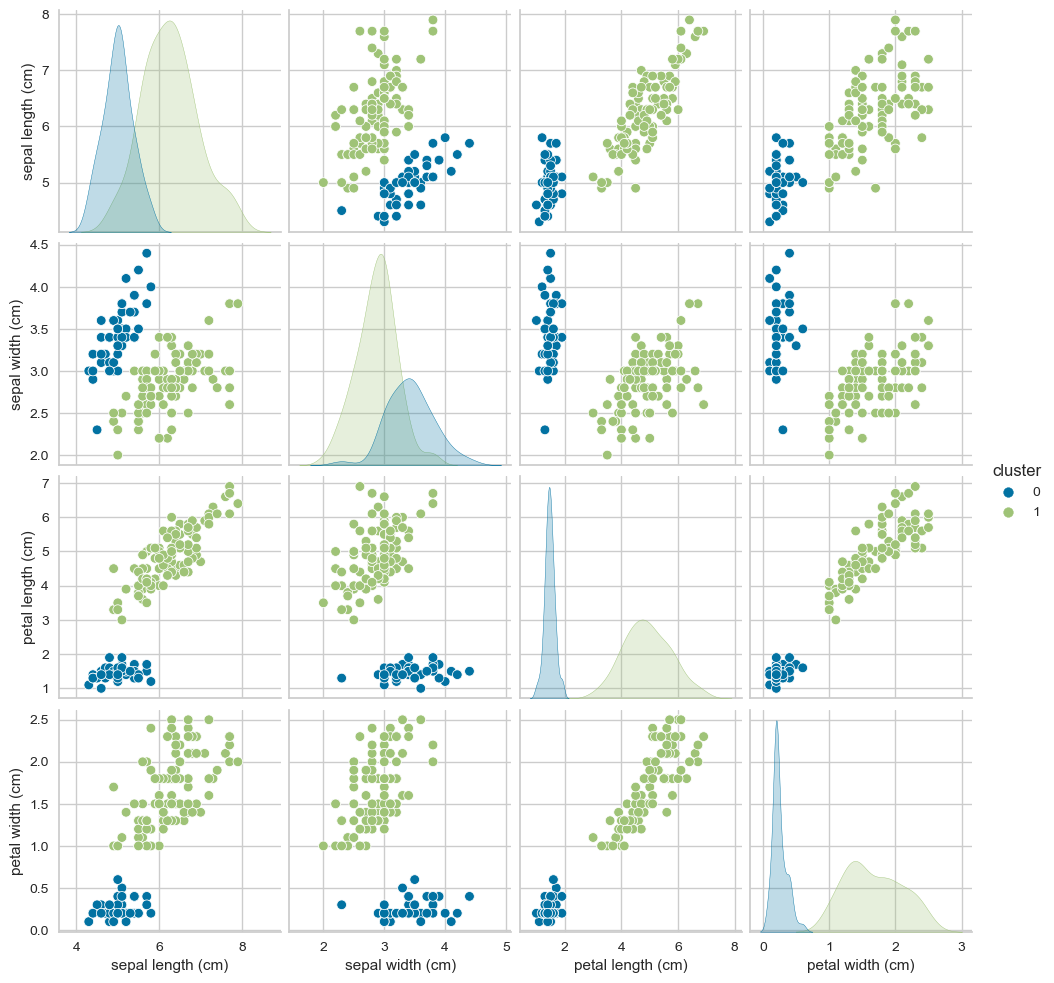

In [14]:
ss = StandardScaler()
coords = ss.fit_transform(df_iris_dbscan)

dbscan = DBSCAN(eps=1.4000000000000001  ,min_samples=5)
y_db = dbscan.fit_predict(coords)
df_iris_dbscan['cluster'] = y_db

sns.color_palette("pastel")
sns.pairplot(df_iris_dbscan, hue='cluster')
plt.show()

### DBSCAN with PCA

            0         1         2
0   -0.630703  0.107578 -0.018719
1   -0.622905 -0.104260 -0.049142
2   -0.669520 -0.051417  0.019644
3   -0.654153 -0.102885  0.023219
4   -0.648788  0.133488  0.015116
..        ...       ...       ...
145  0.551462  0.059841  0.086283
146  0.407146 -0.171821 -0.004102
147  0.447143  0.037560  0.049546
148  0.488208  0.149678  0.239209
149  0.312066 -0.031130  0.118672

[150 rows x 3 columns]


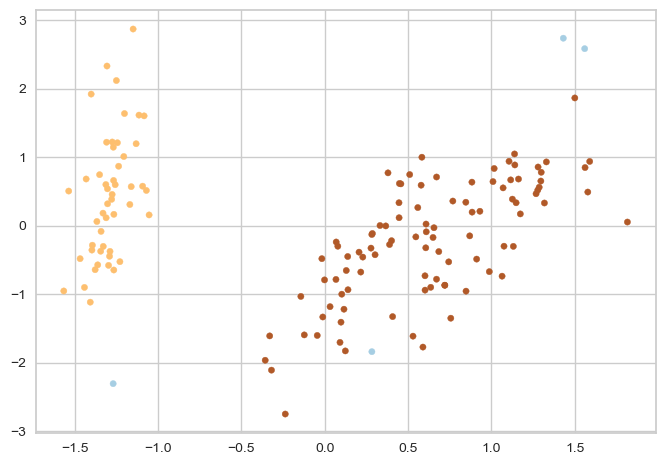

0.5368455212328275

In [12]:
print(df_iris_PCA)
ss = StandardScaler()
coords = ss.fit_transform(df_iris_PCA)

dbscan_iris_pca = DBSCAN(eps=1.1 ,min_samples=5)
db_iris_pca = dbscan_iris_pca.fit_predict(coords)
# df_iris_PCA['cluster'] = y_db

plt.scatter(coords[:, 0], coords[:, 1], c=db_iris_pca, cmap='Paired',s=20)
plt.show()

# df_iris_PCA.drop(columns=["cluster"], inplace=True)
silhouette_score(df_iris_PCA, db_iris_pca)

### Hierarchical Clustering

In [3]:
df_iris_hier = df.iloc[:,0:4]
aff = ['euclidean','manhattan','cosine']
link = ['average','single']
sil = -2
score = -2
a = ''
l = ''
for af in aff:
    for li in link:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity=af, linkage=li)
        labels = hierarchical_cluster.fit_predict(df_iris_hier)
        score = silhouette_score(df_iris_hier, labels)
        if score > sil: 
            sil = score 
            a = af
            l = li
            lab = labels

print(f'max sil for iris, hierarchical clustering is {sil} with affinity: {a} and linkage: {l}')

max sil for iris, hierarchical clustering is 0.5541608580282851 with affinity: euclidean and linkage: average


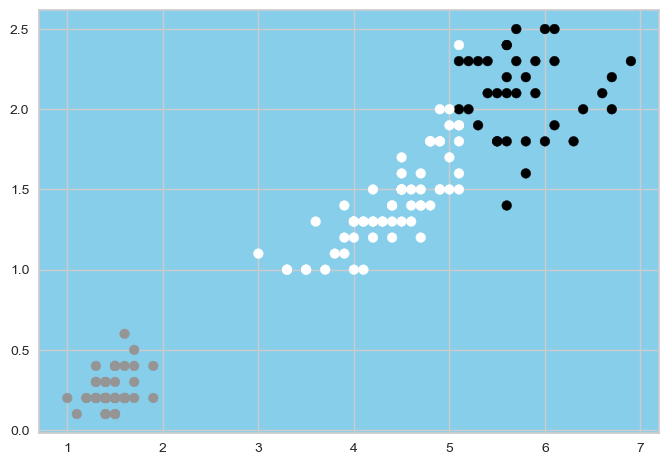

In [6]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(df_iris_hier)
plt.scatter(df_iris_hier.iloc[:,2], df_iris_hier.iloc[:,3], c=labels)
plt.gca().set_facecolor('skyblue')
plt.show()

In [7]:
aff = ['euclidean','manhattan','cosine']
link = ['average','single']
sil = -2
score = -2
a = ''
l = ''
for af in aff:
    for li in link:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity=af, linkage=li)
        labels = hierarchical_cluster.fit_predict(df_iris_PCA)
        score = silhouette_score(df_iris_PCA, labels)
        if score > sil: 
            sil = score 
            a = af
            l = li

print(f'max sil for PCA iris, hierarchical clustering is {sil} with affinity: {a} and linkage: {l}')

NameError: name 'df_iris_PCA' is not defined

            0         1         2
0   -0.630703  0.107578 -0.018719
1   -0.622905 -0.104260 -0.049142
2   -0.669520 -0.051417  0.019644
3   -0.654153 -0.102885  0.023219
4   -0.648788  0.133488  0.015116
..        ...       ...       ...
145  0.551462  0.059841  0.086283
146  0.407146 -0.171821 -0.004102
147  0.447143  0.037560  0.049546
148  0.488208  0.149678  0.239209
149  0.312066 -0.031130  0.118672

[150 rows x 3 columns]


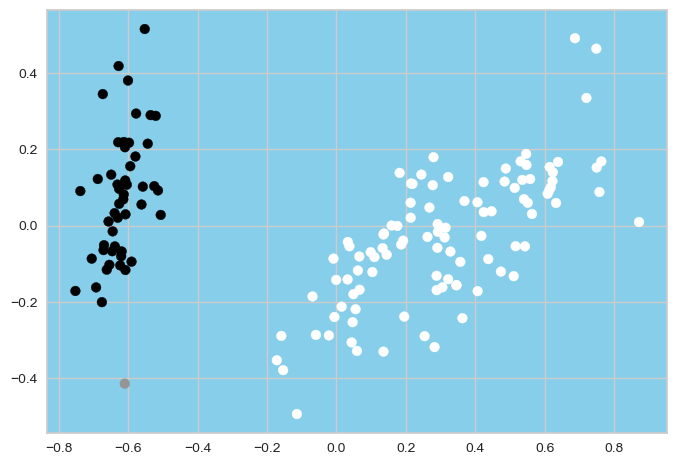

0.5356666849976572

In [31]:
print(df_iris_PCA)
hierarchical_cluster_pca = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels_pca = hierarchical_cluster_pca.fit_predict(df_iris_PCA)
plt.scatter(df_iris_PCA.iloc[:,0], df_iris_PCA.iloc[:,1], c=labels_pca)
plt.gca().set_facecolor('skyblue')
plt.show()
silhouette_score(df_iris_PCA, labels_pca)

### GMM

In [36]:
df_iris_gmm = df.iloc[:,0:4]
covar_type = ["full","tied","diag","spherical"]
sil = -2
score = -2
ctype = ''

for co in covar_type:     
    gmm = GaussianMixture(n_components = 3, covariance_type=co)
    gmm.fit(df_iris_gmm)
    clusters = gmm.predict(df_iris_gmm)
    score = silhouette_score(df_iris_gmm, clusters)
    if score > sil:
        sil = score
        ctype = co

print(f'max sil for iris, gmm clustering is {sil} with covariance type: {ctype}')

max sil for iris, gmm clustering is 0.5528190123564095 with covariance type: spherical


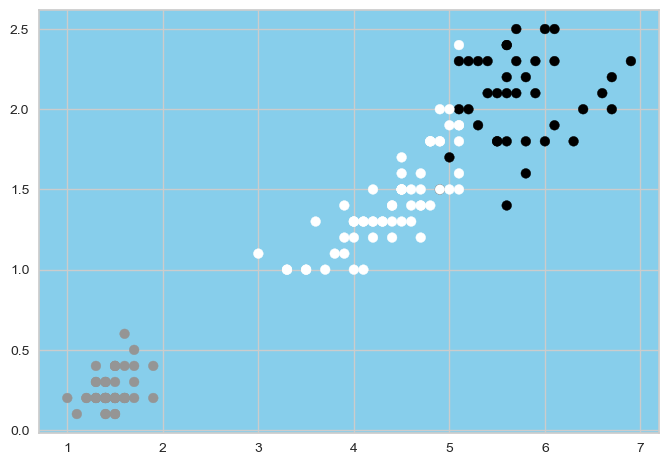

In [39]:
gmm = GaussianMixture(n_components = 3, covariance_type='spherical')
gmm.fit(df_iris_gmm)
clusters = gmm.predict(df_iris_gmm)
# df_iris_gmm['cluster'] = clusters

plt.scatter(df_iris_gmm.iloc[:,2], df_iris_gmm.iloc[:,3], c=clusters)
plt.gca().set_facecolor('skyblue')
plt.show()

In [26]:
covar_type = ["full","tied","diag","spherical"]
sil = -2
score = -2
ctype = ''

for co in covar_type:     
    gmm = GaussianMixture(n_components = 3, covariance_type=co)
    gmm.fit(df_iris_PCA)
    clusters = gmm.predict(df_iris_PCA)
    score = silhouette_score(df_iris_PCA, clusters)
    if score > sil:
        sil = score
        ctype = co

print(f'max sil for PCA iris, gmm clustering is {sil} with covariance type: {ctype}')

max sil for PCA iris, gmm clustering is 0.6456955816191341 with covariance type: full


            0         1         2
0   -0.805687  0.093426  0.020530
1   -0.797823 -0.112785 -0.036247
2   -0.833393 -0.068795  0.043119
3   -0.821063 -0.117571  0.032683
4   -0.819475  0.115582  0.057679
..        ...       ...       ...
145  0.743879  0.059311  0.084906
146  0.635203 -0.184028  0.044541
147  0.664104  0.025133  0.098826
148  0.695996  0.134949  0.241791
149  0.562211 -0.061595  0.199152

[150 rows x 3 columns]


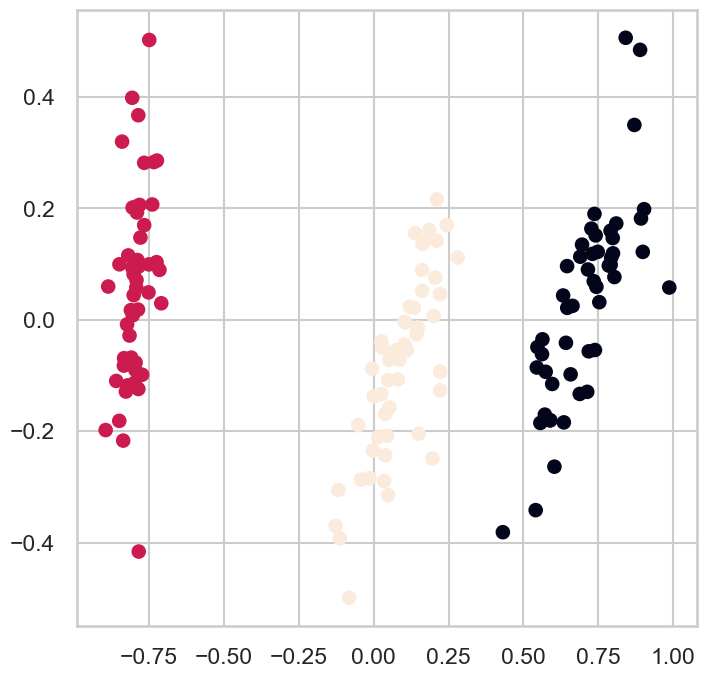

In [27]:
print(df_iris_PCA)
gmm = GaussianMixture(n_components = 3, covariance_type='full')
gmm.fit(df_iris_PCA)
clusters = gmm.predict(df_iris_PCA)
# df_iris_PCA['cluster'] = clusters

plt.scatter(df_iris_PCA.iloc[:,0], df_iris_PCA.iloc[:,1], c=clusters)
plt.show()

## Customer dataset
Repeat all the above on the customer data set 

In [13]:
df_cust = pd.read_csv(r'D:\Zeina\Uni\Semester10\Customer data.csv')
print(df_cust)

             ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2              

In [14]:
df_feat = df_cust.iloc[:,1:]

      Sex  Marital status       Age  Education    Income  Occupation  \
0     0.0             0.0  0.844828   0.666667  0.324781         0.5   
1     1.0             1.0  0.068966   0.333333  0.420210         0.5   
2     0.0             0.0  0.534483   0.333333  0.195144         0.0   
3     0.0             0.0  0.465517   0.333333  0.496223         0.5   
4     0.0             0.0  0.603448   0.333333  0.413842         0.5   
...   ...             ...       ...        ...       ...         ...   
1995  1.0             0.0  0.500000   0.333333  0.320595         0.0   
1996  1.0             1.0  0.155172   0.333333  0.299460         0.5   
1997  0.0             0.0  0.224138   0.000000  0.184871         0.0   
1998  1.0             1.0  0.103448   0.333333  0.227162         0.0   
1999  0.0             0.0  0.120690   0.000000  0.119123         0.0   

      Settlement size  
0                 1.0  
1                 1.0  
2                 0.0  
3                 0.5  
4              

<AxesSubplot:>

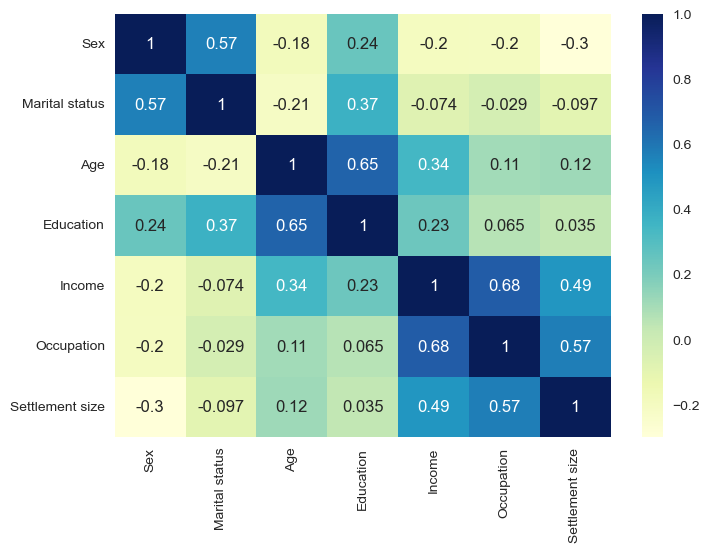

In [19]:
# sns.heatmap(df_feat.corr())
scaler = MinMaxScaler() 
cust_scaled = scaler.fit_transform(df_feat)
cust_scaled = pd.DataFrame(cust_scaled, columns=df_feat.columns)
print(cust_scaled)
sns.heatmap(df_feat.corr(), cmap="YlGnBu", annot=True)

### Education and age are correlated, occupation and income are correlated, occupation and settlement size are correlated, marital status and sex are correlated. This leads to reduction to 4 features.

### KMeans

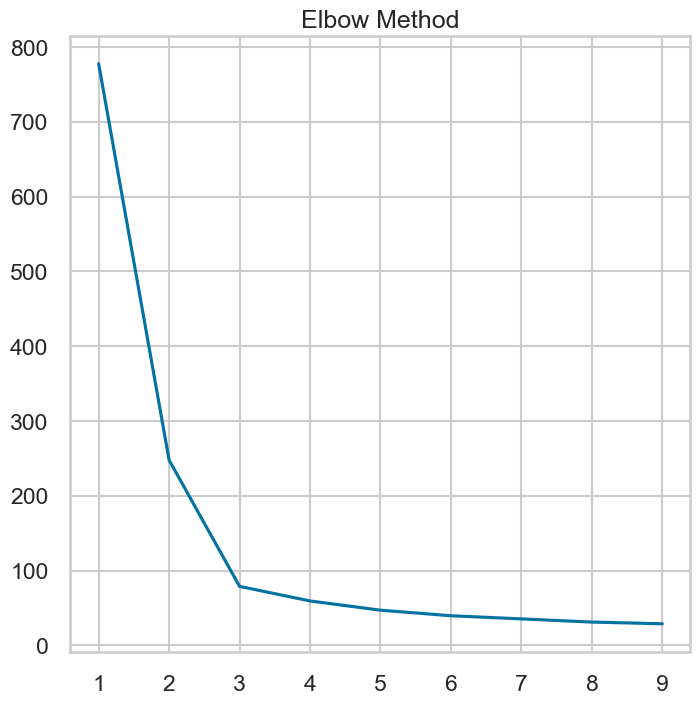

In [221]:
score_km = []
k = range(1,10)
sse = []

for i in k :
    km = KMeans(n_clusters = i)
    y_km = km.fit(df_features)
    sse.append(km.inertia_)

plt.title('Elbow Method')
plt.plot(k,sse)
plt.show()

#### Deciding between 2 or 3 or 4 clusters

In [37]:
print(df_feat)

km2 = KMeans(n_clusters=2)
y_km2 = km2.fit_predict(cust_scaled)

km3 = KMeans(n_clusters=3)
y_km3 = km3.fit_predict(df_feat)
# df_feat['cluster'] = y_km3

km4 = KMeans(n_clusters=4)
y_km4 = km4.fit_predict(df_feat)

print(f'sil score for k = 2: {silhouette_score(df_feat, y_km2)}')
print(f'sil score for k = 3: {silhouette_score(df_feat, y_km3)}')
print(f'sil score for k = 4: {silhouette_score(df_feat, y_km4)}')

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]
sil score for k = 2: 0.5834

#### Using k = 2

In [38]:
df_feat['cluster'] = y_km2
print(df_feat)

      Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  cluster  
0                   2        0  
1                   2        1  
2                   0        0  
3                   1        1  
4                   1        1  
...               ...

             0         1         2         3
0     0.826086  0.354652  0.158422  0.489010
1    -0.524891  0.716293  0.240947 -0.330927
2     0.486009 -0.690668 -0.181594  0.217384
3     0.707351 -0.028668  0.044773  0.146397
4     0.712574 -0.037939  0.046813  0.230521
...        ...       ...       ...       ...
1995 -0.195388 -0.680837  0.550240  0.183037
1996 -0.793264 -0.016224  0.007582 -0.066197
1997  0.494899 -0.746080 -0.189808 -0.218108
1998 -0.875828 -0.285273 -0.094256 -0.154778
1999  0.483115 -0.761565 -0.200735 -0.302219

[2000 rows x 4 columns]


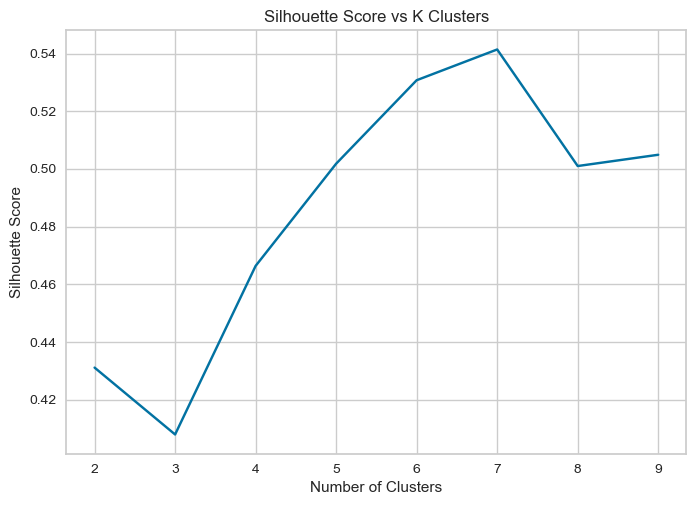

In [20]:
pca = PCA(n_components=4) 
X_cust = pca.fit_transform(cust_scaled) # project the original data into the PCA space

df_cust_PCA = pd.DataFrame(X_cust)
print(df_cust_PCA)
sil_arr = []

for k in range (2,10):
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(df_cust_PCA)
    sil_arr.append(silhouette_score(df_cust_PCA, y_km))

plt.title('Silhouette Score vs K Clusters')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score')
plt.plot(range(2,10),sil_arr)

# df_cust_PCA['cluster'] = y_km

# df0 = df_cust_PCA[df_cust_PCA['cluster'] == 0]
# df1 = df_cust_PCA[df_cust_PCA['cluster'] == 1]


# plt.scatter(df0.iloc[:,0], df0.iloc[:,1], color='r' )
# plt.scatter(df1.iloc[:,0], df1.iloc[:,1], color='b')

# plt.legend()
# plt.show()

# df_cust_PCA.drop(columns=["cluster"], inplace=True)

# print(f'sil score k-means clustering using PCA for k = 2: {silhouette_score(df_cust_PCA, y_km)}')

#### clustering with k = 7:

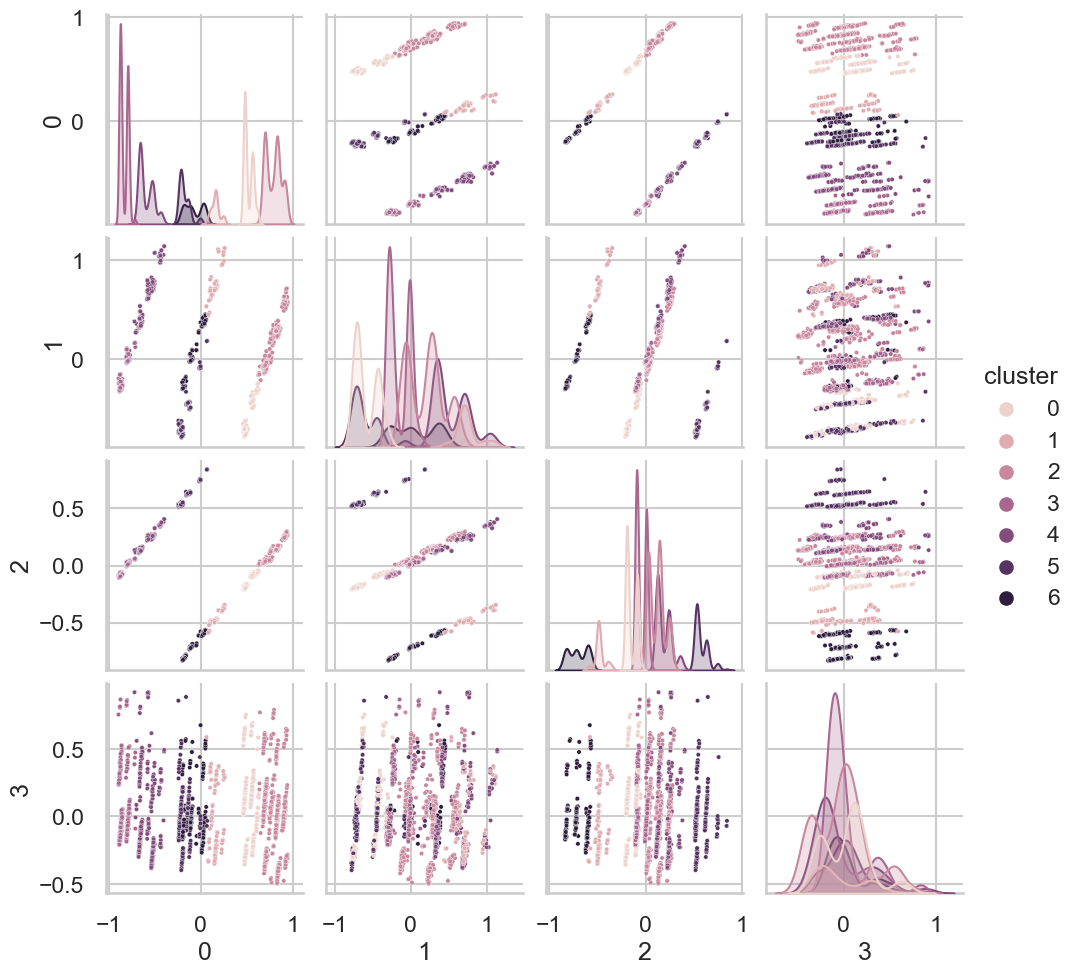

In [78]:
km = KMeans(n_clusters=7)
y_km = km.fit_predict(df_cust_PCA)
df_cust_PCA['cluster'] = y_km

sns.color_palette("pastel")
sns.pairplot(df_cust_PCA, hue='cluster',plot_kws={"s": 10})
plt.show()

df_cust_PCA.drop(columns=["cluster"], inplace=True)

### DBSCAN

In [75]:
df_cust_dbscan = df_cust.iloc[:,1:]
ss = StandardScaler()
coords = ss.fit_transform(df_cust_dbscan)

# dbscan = DBSCAN(eps=10, min_samples=200)
# y_db = dbscan.fit_predict(coords)
# # # df_features_dbscan['cluster'] = y_db
# silhouette_score(df_dbscan, y_db)

# # sns.color_palette("pastel")
# # sns.pairplot(df_features_dbscan, hue='cluster')
# # plt.show()

In [76]:
sil = -100
eps = 0
minp = 0
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
#         ss = StandardScaler()
#         coords = ss.fit_transform(coords)
        db = DBSCAN(eps=i, min_samples=j)
        db.fit(coords)
        y_db = dbscan.fit_predict(coords)
        if len(set(y_db)) == 1:
#             print(f'eps is {i}, minp is {j}, one cluster')
            score = -2
        else: 
            score = silhouette_score(df_cust_dbscan, y_db)
        if score > sil:
            sil = score 
            eps = i
            minp = j
#             continue
#         sil_list.append(silhouette_score(df_dbscan, y_db))
print(f'max sil for dbscan for customer dataset is {sil} with eps = {i}, minp = {j}')

max sil for dbscan for customer dataset is -0.36137297117222567 with eps = 3.0000000000000004, minp = 25.699999999999985


In [80]:
sil = -100
eps = 0
minp = 0
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
#         ss = StandardScaler()
#         coords = ss.fit_transform(coords)
        db = DBSCAN(eps=i, min_samples=j)
        db.fit(coords)
        y_db = dbscan.fit_predict(coords)
        if len(set(y_db)) == 1:
#             print(f'eps is {i}, minp is {j}, one cluster')
            score = -2
        else: 
            score = silhouette_score(df_cust_PCA, y_db)
        if score > sil:
            sil = score 
            eps = i
            minp = j
#             continue
#         sil_list.append(silhouette_score(df_dbscan, y_db))
print(f'max sil for dbscan PCA for customer dataset is {sil} with eps = {i}, minp = {j}')

max sil for dbscan PCA for customer dataset is 0.40814623576836867 with eps = 3.0000000000000004, minp = 25.699999999999985


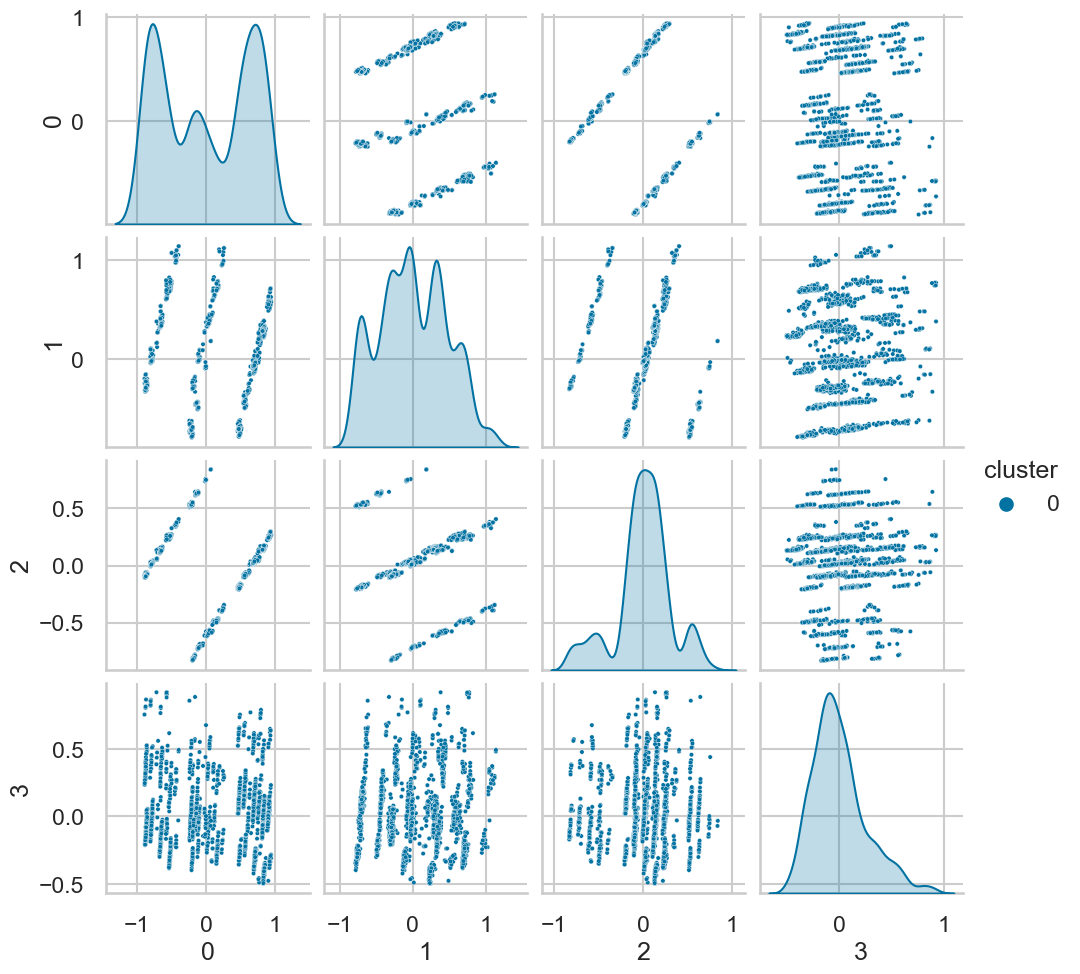

In [84]:
ss = StandardScaler()
coords = ss.fit_transform(df_cust_PCA)

dbscan = DBSCAN(eps=3, min_samples=25.7)
y_db = dbscan.fit_predict(coords)
df_cust_PCA['cluster'] = y_db

sns.color_palette("pastel")
sns.pairplot(df_cust_PCA, hue='cluster',plot_kws={"s": 10})
plt.show()

df_cust_PCA.drop(columns=["cluster"],  inplace=True)

### Hierarchical 

In [16]:
df_cust_hier = df_cust.iloc[:,1:]

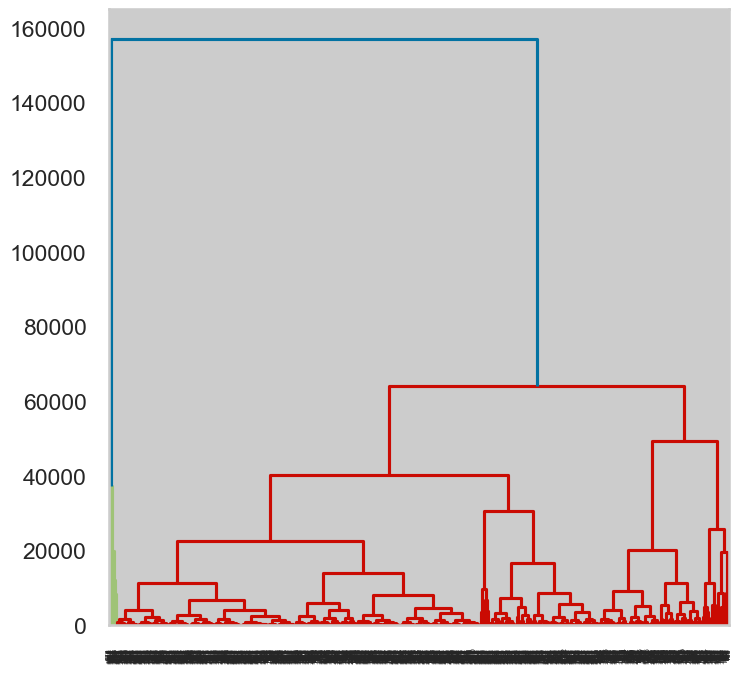

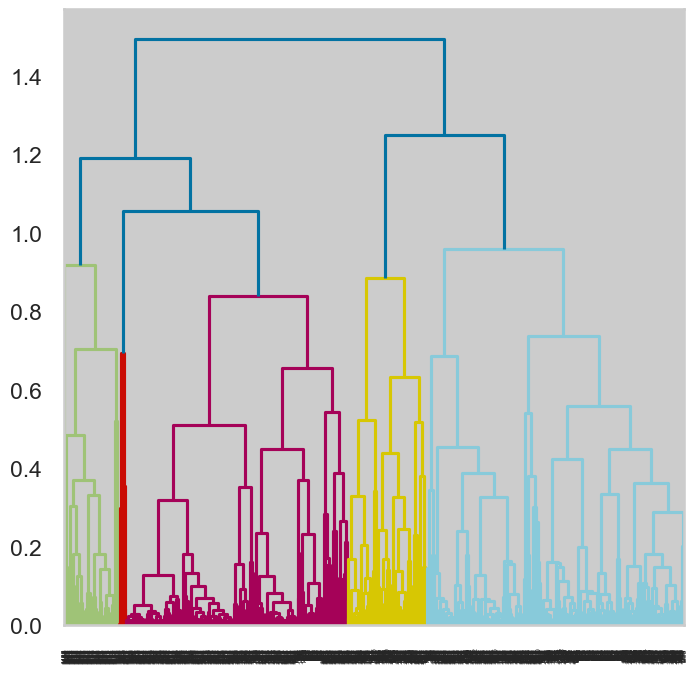

In [88]:
dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "average", metric='euclidean'))
plt.show()

dendrogram = sch.dendrogram(sch.linkage(df_cust_PCA, method  = "average", metric='euclidean'))
plt.show()

In [32]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
print(f'score without PCA: {silhouette_score(df_cust_hier, labels)}')

hierarchical_cluster = AgglomerativeClustering(n_clusters=6,affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_PCA)
print(f'score with PCA: {silhouette_score(df_cust_PCA, labels)}')

score without PCA: 0.72930877967469
score with PCA: 0.47950635117547247


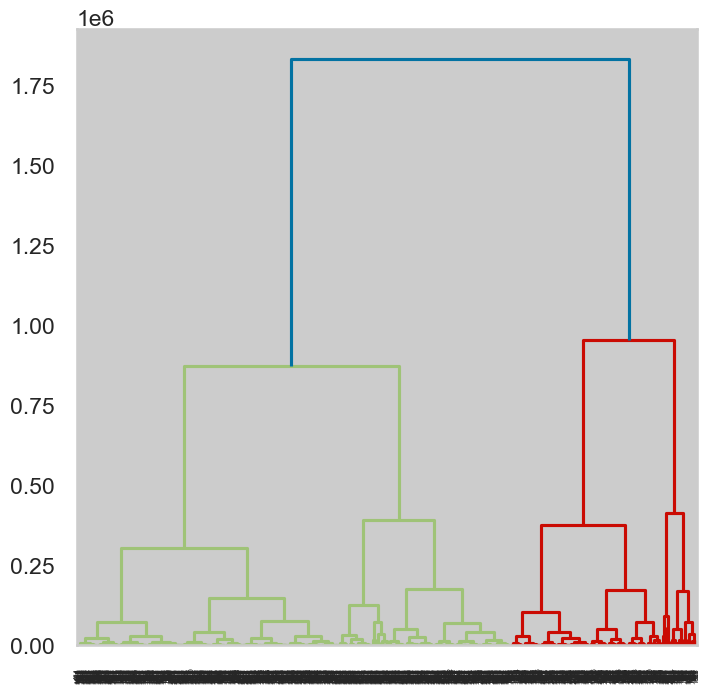

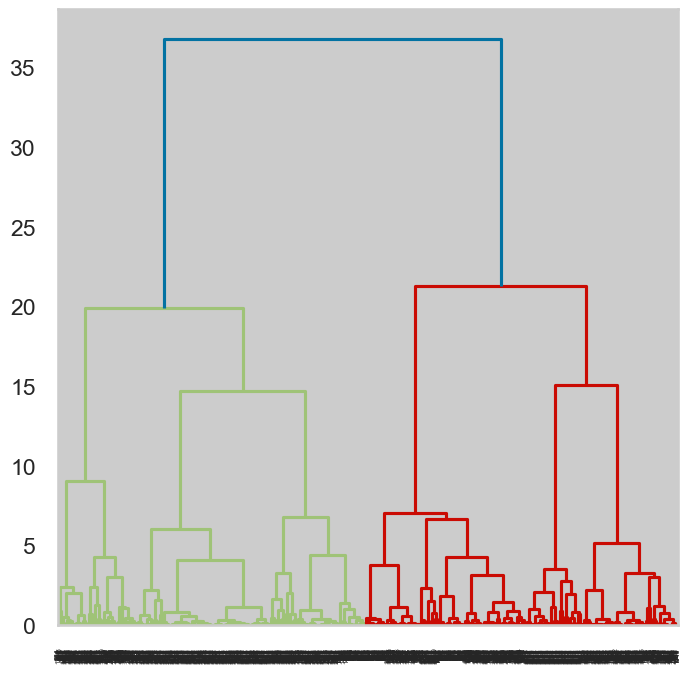

In [96]:
dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "ward", metric='euclidean'))
plt.show()

dendrogram = sch.dendrogram(sch.linkage(df_cust_PCA, method  = "ward", metric='euclidean'))
plt.show()

In [102]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', 
                                           linkage='ward')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
print(f'score without PCA: {silhouette_score(df_cust_hier, labels)}')

hierarchical_cluster = AgglomerativeClustering(n_clusters=7,affinity='euclidean', 
                                           linkage='ward')
labels = hierarchical_cluster.fit_predict(df_cust_PCA)
print(f'score with PCA: {silhouette_score(df_cust_PCA, labels)}')

score without PCA: 0.5317617689963741
score with PCA: 0.5412261127481797


In [36]:
# dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "single", metric='euclidean'))
# plt.show()

In [53]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
df_cust_hier['cluster'] = labels
print(df_cust_hier)
# print(np.array(labels))
print(len(set(df_cust_hier['cluster'])))

      Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  cluster  
0                   2        0  
1                   2        0  
2                   0        0  
3                   1        0  
4                   1        0  
...               ...

In [56]:
# df_cust_hier = df_cust.iloc[:,1:]
# sil_cust_hier = []
# for i in np.arange(1,120,100):
#     hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='euclidean', 
#                                                linkage='average', distance_threshold=i)
#     labels = hierarchical_cluster.fit_predict(df_cust_hier)
#     sil_cust_hier.append(silhouette_score(df_cust_hier, labels))
# # best sil for euc av is at threshold = 300 > 0.56 [[[[[[[[[[[same as manhattan]]]]]]]]]]]
# # best sil for euc ward is at threshold = 700 > 0.58

# plt.title("affinity='euclidean',linkage='average'")
# plt.plot(np.arange(100,1100,100),sil_cust_hier)

### GMM

In [113]:
df_cust_gmm = df_cust.iloc[:,1:]
covar_type = ["full","tied","diag","spherical"]
clusters = [2,3,4,5,6,7,8,9,10]
sil = -100
n_clusters = 0
co_type = ''
for c in clusters:
    for co in covar_type:     
        gmm = GaussianMixture(n_components = c, covariance_type=co)
        gmm.fit(df_cust_gmm)
        clusters = gmm.predict(df_cust_gmm)
        score = silhouette_score(df_cust_gmm, clusters)
        if score > sil:
            sil = score 
            n_clusters = c
            co_type = co
print(f'best silhouette score: {n_clusters} clusters, {co_type} type, {sil} score')

best silhouette score: 2 clusters, tied type, 0.6376184153883705 score


In [115]:
clusters = [2,3,4,5,6,7,8,9,10]
sil = -100
n_clusters = 0
co_type = ''
for c in clusters:
    for co in covar_type:     
        gmm = GaussianMixture(n_components = c, covariance_type=co)
        gmm.fit(df_cust_PCA)
        clusters = gmm.predict(df_cust_PCA)
        if score > sil:
            sil = score 
            n_clusters = c
            co_type = co
print(f'best silhouette score: {n_clusters} clusters, {co_type} type, {sil} score')

best silhouette score: 2 clusters, full type, 0.5235174463821067 score


#### Clustering with highest silhouette score: 2 clusters, tied covariance type, silhouette score: 0.6376184153883705, without PCA

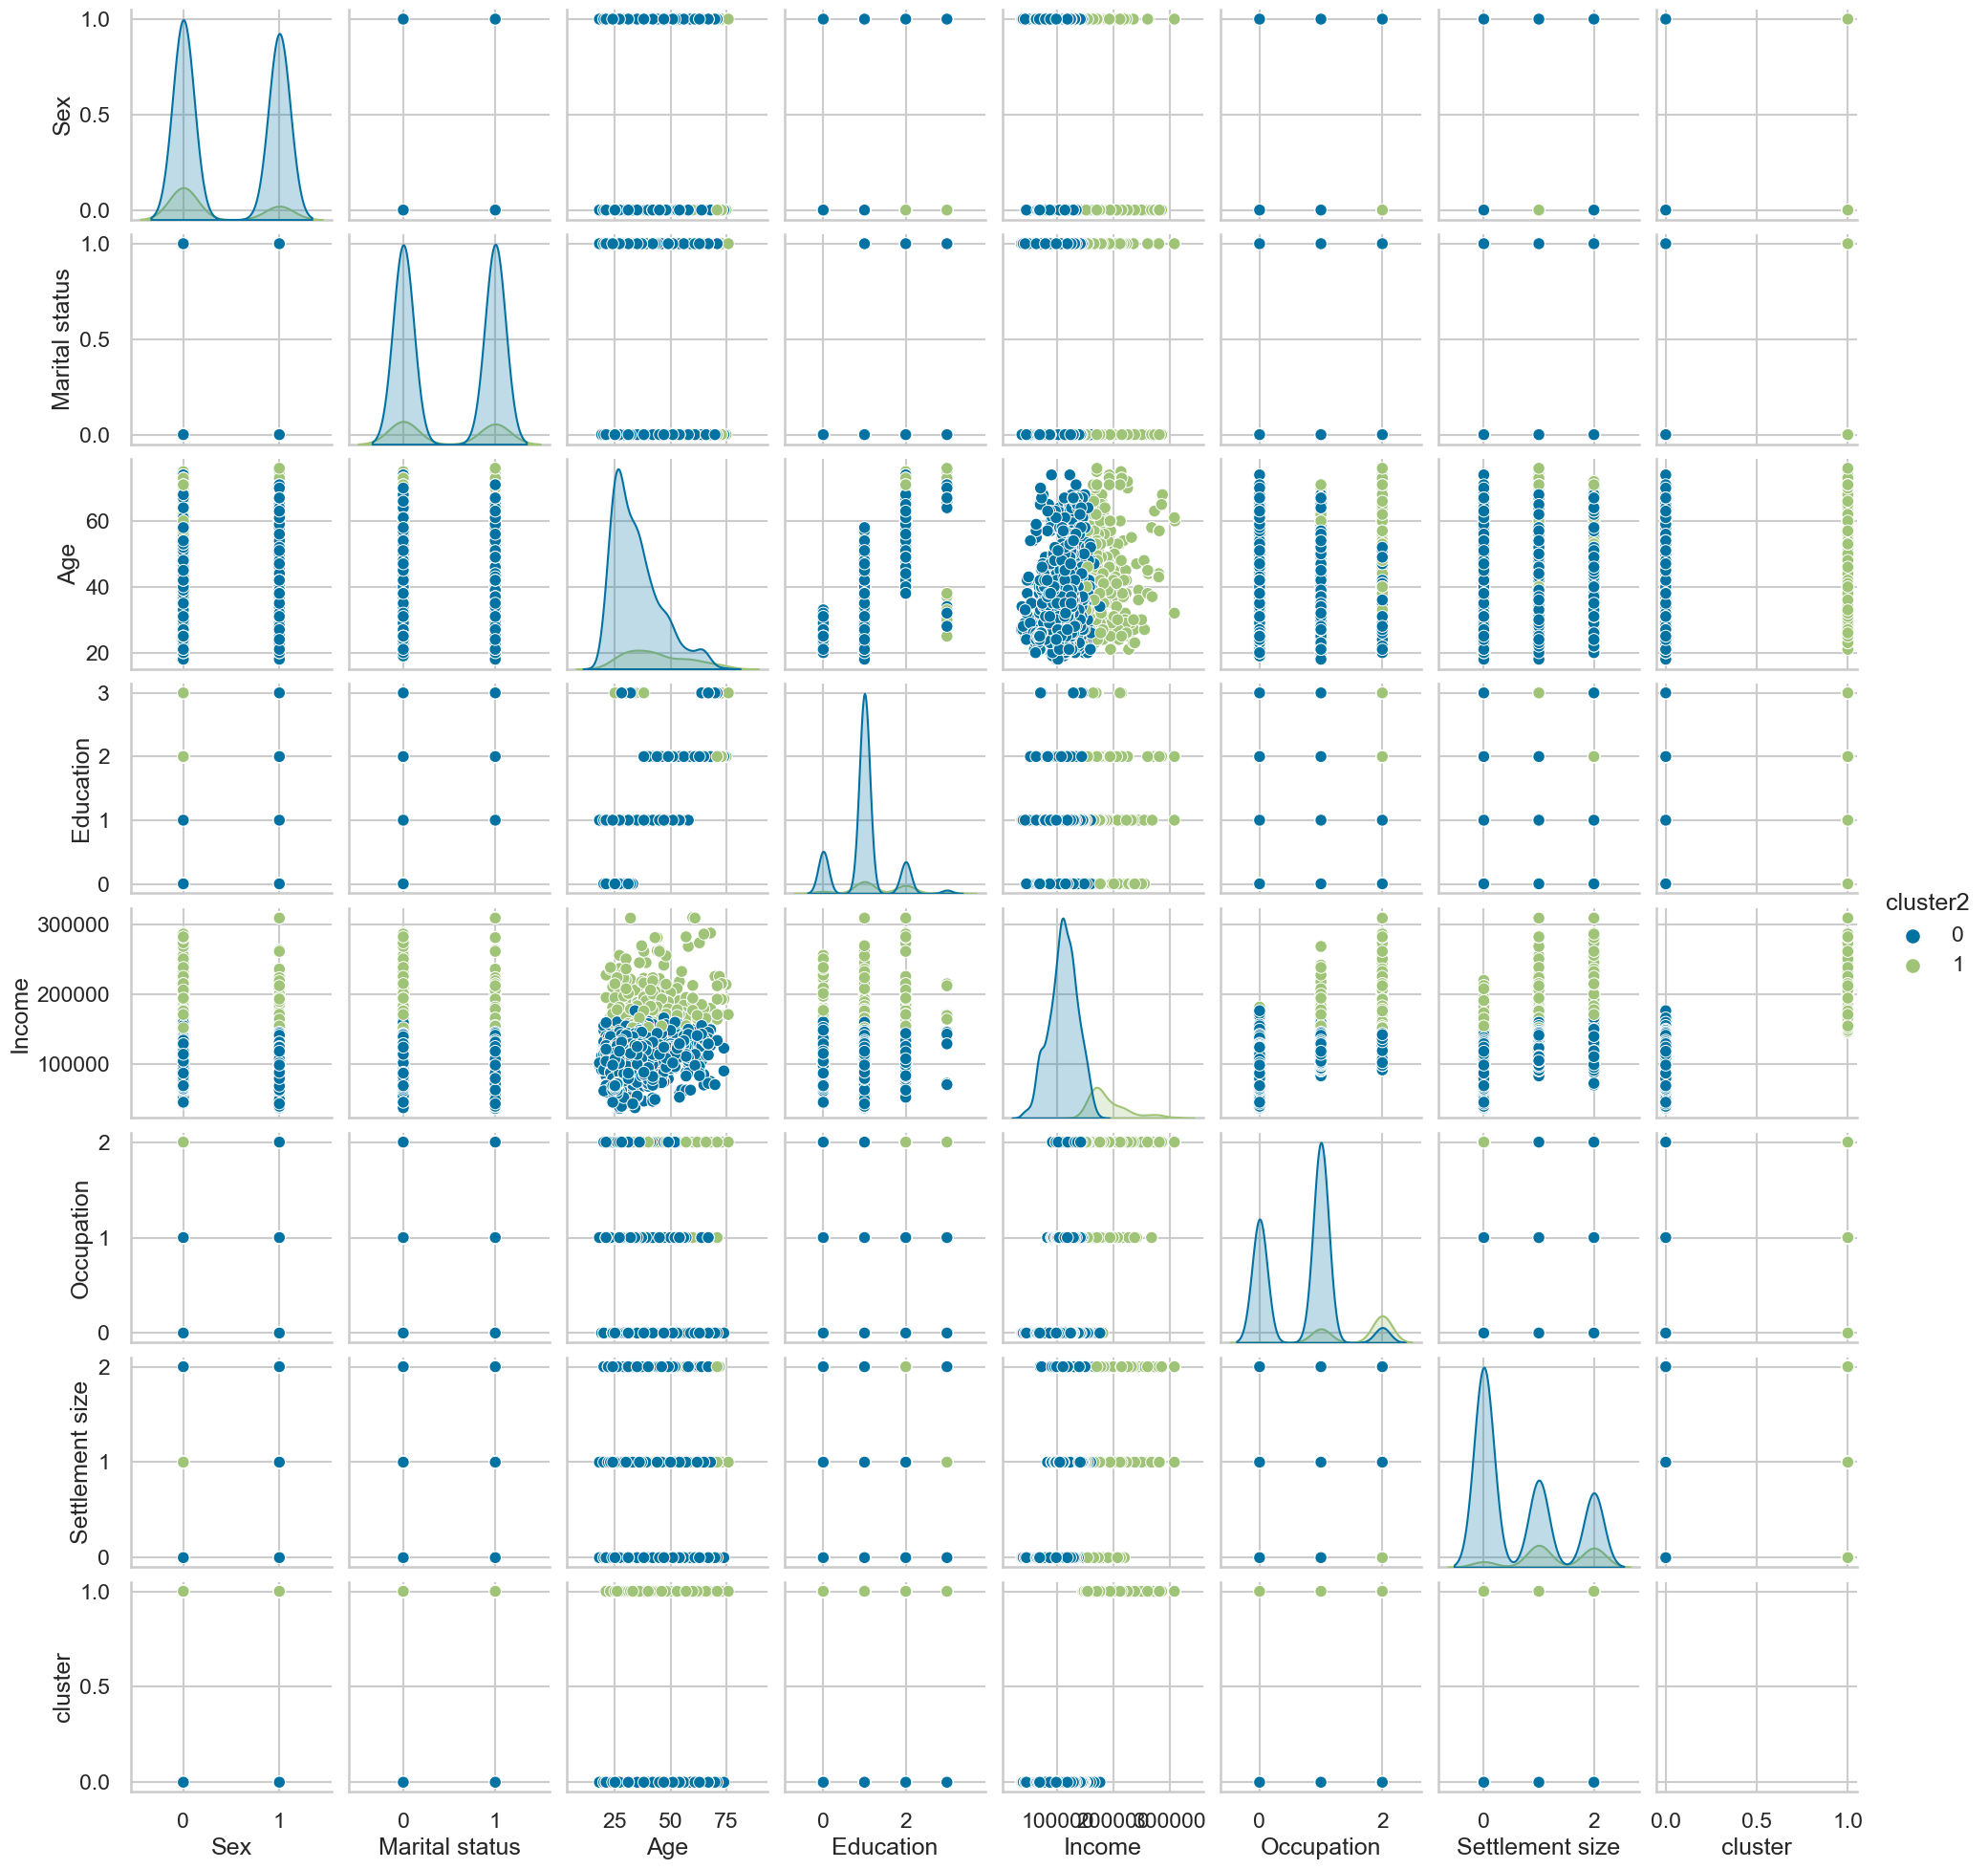

In [70]:
gmm = GaussianMixture(n_components = 2, covariance_type='tied')
gmm.fit(df_cust_gmm)
clusters = gmm.predict(df_cust_gmm)
df_cust_gmm['cluster2'] = clusters

sns.color_palette("pastel")
sns.pairplot(df_cust_gmm, hue='cluster2')
plt.show()

#### Clustering with 2 clusters, full covariance type, silhouette score: 0.5235174463821067 with PCA

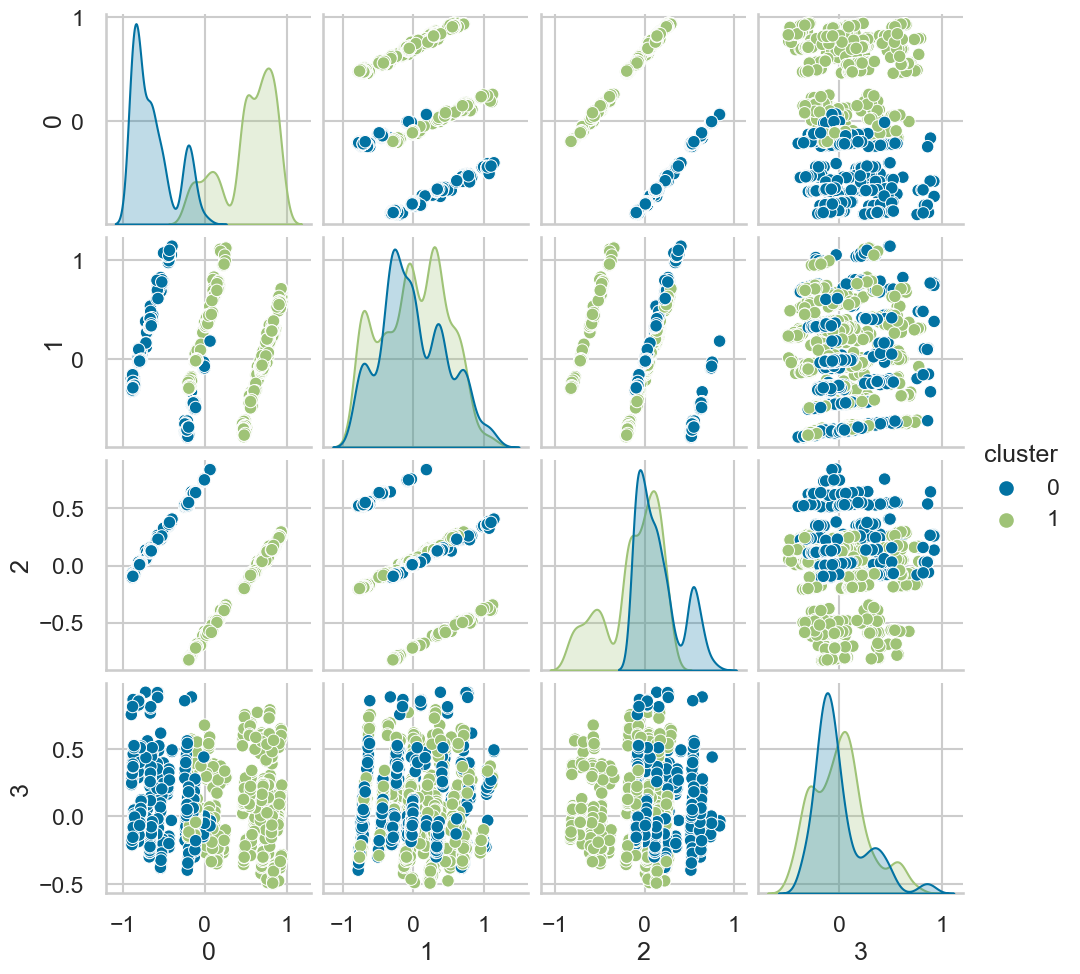

In [117]:
gmm = GaussianMixture(n_components = 2, covariance_type='full')
gmm.fit(df_cust_PCA)
clusters = gmm.predict(df_cust_PCA)
df_cust_PCA['cluster'] = clusters

sns.color_palette("pastel")
sns.pairplot(df_cust_PCA, hue='cluster')
plt.show()

df_cust_PCA.drop(columns=["cluster"],  inplace=True)